In [612]:
import pandas as pd
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score 

In [725]:
ts = pd.read_csv("ts_transformed.csv")

ts['rating_category'] = ts['rating_category'].replace('Low', 'Medium Low')

In [726]:
ts

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High


# Clustering

## Distance-based Clustering

### Euclidean

In [614]:
ts_numeric = ts.drop(columns=['id', 'rating', 'genre', 'rating_category'])

train, test = train_test_split(ts_numeric, test_size = 2, random_state = 42)

In [615]:
# !pip install tslearn
# !pip install h5py
# !pip install scikit-learn-extra

In [616]:
# from sklearn_extra.cluster import KMedoids
# from tslearn.metrics import cdist_dtw

# # Calcolo matrice di distanza DTW con vincolo Sakoe-Chiba
# dists = cdist_dtw(ts_numeric, global_constraint="sakoe_chiba", sakoe_chiba_radius=4)

# # Clustering con KMedoids
# clusterer = KMedoids(n_clusters=3, metric="precomputed", random_state=0)
# clusterer.fit(dists)
# labels = clusterer.labels_

In [617]:
clusterer = TimeSeriesKMeans(n_clusters=7, metric="euclidean", random_state=42)

In [618]:
# Convertiamo il DataFrame in un array NumPy 3D con forma (n_istanze, 1, n_timepoint)
def convert_to_numpy3D(df):
    return np.expand_dims(df.values, axis=1)

# Applichiamo la conversione
ts_numeric = convert_to_numpy3D(ts_numeric)

clusterer.fit(ts_numeric)

TimeSeriesKMeans(metric='euclidean', n_clusters=7, random_state=42)

In [619]:
clusterer.labels_ = clusterer.labels_ + 1

In [620]:
ts_numeric = pd.DataFrame(ts_numeric.reshape(1134, 100))
ts_numeric["cluster"] = clusterer.labels_ 
ts_numeric.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,cluster
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.668877,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,4
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,0.826150,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,1
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,0.003613,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,1
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.231107,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,6
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.648343,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,3


c:\Users\Lavigi\programmi\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Lavigi\programmi\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Lavigi\programmi\Lib\site-packages\numpy\core\_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


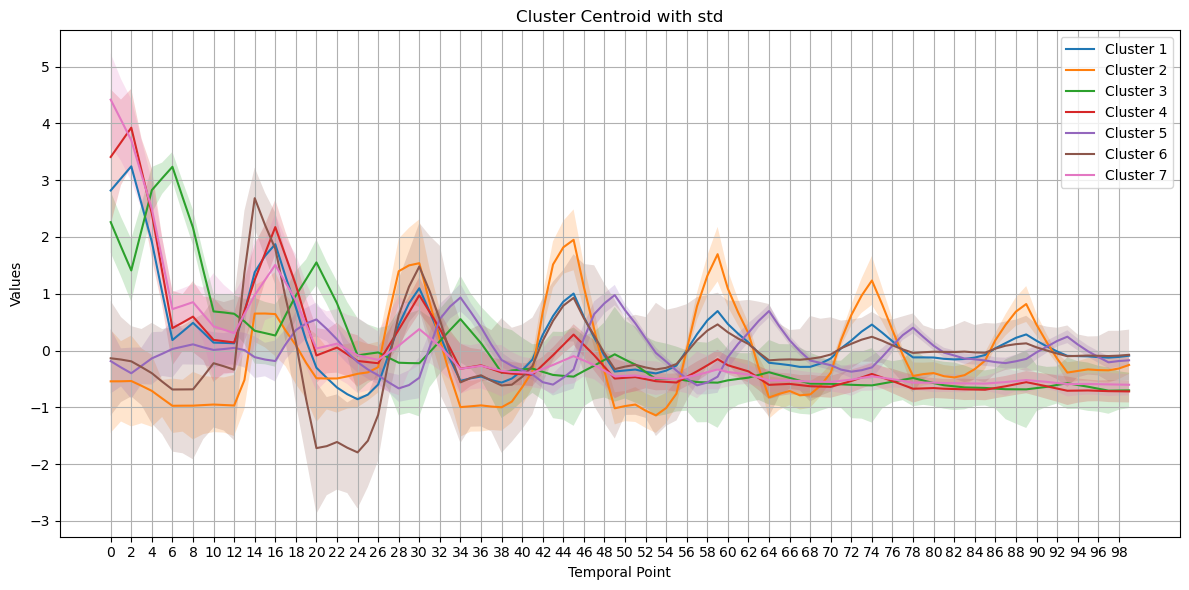

In [621]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i centroidi
centroids = clusterer.cluster_centers_

# Calcola la deviazione standard per ciascun cluster
std_devs = np.zeros_like(centroids)
for i in range(clusterer.n_clusters):
    # Estrai le serie del cluster i
    cluster_data = ts_numeric[ts_numeric["cluster"] == i].drop(columns=["cluster"]).values
    std_devs[i] = np.std(cluster_data, axis=0)

# Plot
plt.figure(figsize=(12, 6))
for i, centroid in enumerate(centroids):
    mean = centroid.flatten()
    std = std_devs[i].flatten()
    plt.plot(mean, label=f'Cluster {i + 1}')
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)


# Imposta i tick dell'asse x ogni 2 unità
plt.xticks(ticks=np.arange(0, len(mean), 2))

plt.title('Cluster Centroid with std')
plt.xlabel('Temporal Point')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cluster 0 inizia con valori altri, ricorrenti poi tende ad appiattirsi,  
cluster 1 parte in basso, ma poi ha picchi piu elevati, ricorrenti e continui, ha std elevata  
cluster 2 simile a cluster 0 ma traslato piu avanti  
cluster 3 simile a 0 ma si appiattisce piu rapidamente  
cluster 4 inizia in basso ma poi picchi piu elevati e traslati, ha std elevata in tutti i punti temporali 
cluster 5 inizia in basso, inizialmente ha avuto picchi piu elevati in alto e in basso  
cluster 6 inizia piu in alto, poi valori medi e piatti

Questo codice serve a visualizzare l'andamento delle serie temporali raggruppate per cluster, usando colori distinti per ogni cluster. È utile per analizzare visivamente come si comportano i diversi gruppi nel tempo.

### Visual

In [622]:
visual = ts.drop(columns=['id', 'rating', 'genre', 'rating_category'])

In [623]:
visual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.701731,-0.668877,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,0.859240,0.826150,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,0.035321,0.003613,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.188766,-0.231107,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.655819,-0.648343,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,0.759350,...,-0.576755,-0.585374,-0.589578,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360
1130,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,1.868924,...,-0.678515,-0.676584,-0.695051,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872
1131,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,0.670843,...,-0.548921,-0.421167,-0.479973,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430
1132,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,-0.095978,...,-0.427137,-0.475405,-0.534486,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343


In [624]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
pca_k = PCA(n_components=2)
ts_pca_k = pca_k.fit_transform(visual)

In [625]:
ts_pca_k = pd.DataFrame(ts_pca_k)
ts_pca_k

,0,1
0,-1.127949,-0.094097
1,2.852529,1.545328
2,1.667263,-0.413021
3,6.053783,-1.210072
4,-3.578918,3.157122
...,...,...
1129,-3.389733,-0.213200
1130,-2.946928,1.164163
1131,-2.005571,-1.452818
1132,-2.010297,-1.046856


In [626]:
ts_pca_k["cluster"] = clusterer.labels_
ts_pca_k['rating_category'] = ts['rating_category']
ts_pca_k


,0,1,cluster,rating_category
0,-1.127949,-0.094097,4,High
1,2.852529,1.545328,1,High
2,1.667263,-0.413021,1,High
3,6.053783,-1.210072,6,High
4,-3.578918,3.157122,3,High
...,...,...,...,...
1129,-3.389733,-0.213200,7,Medium
1130,-2.946928,1.164163,7,Medium
1131,-2.005571,-1.452818,4,High
1132,-2.010297,-1.046856,4,High


In [627]:
# ts_fscaled_df = pd.DataFrame(ts_fscaled)

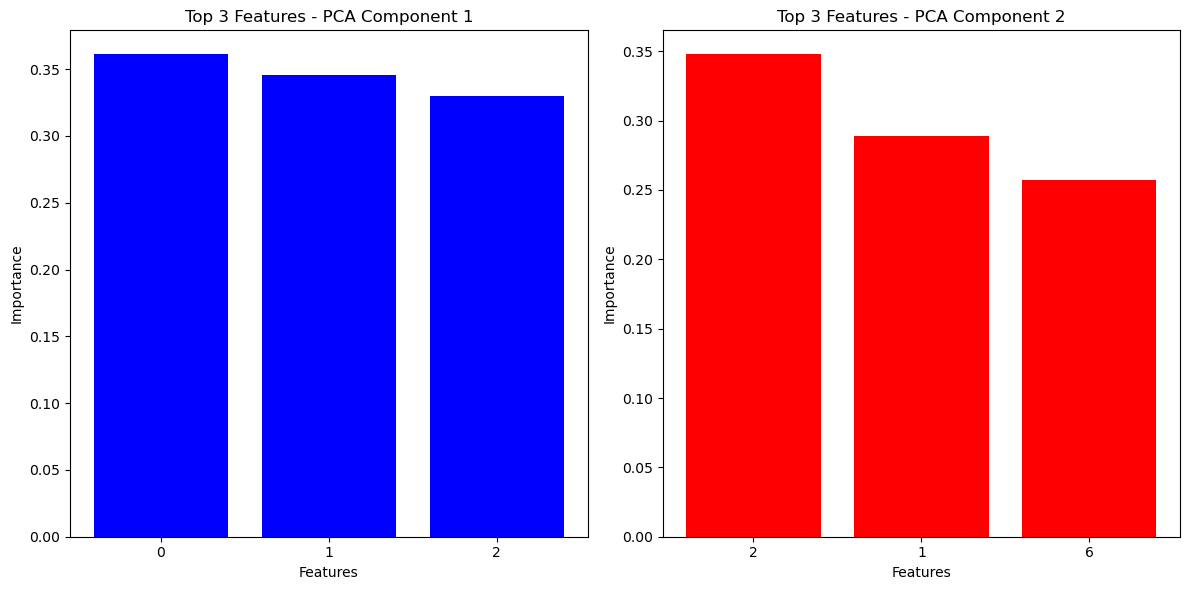

Top 3 features for PCA Component 1:
0    0.360968
1    0.345377
2    0.329633
Name: PC1, dtype: float64

Top 3 features for PCA Component 2:
2    0.347665
1    0.288643
6    0.257000
Name: PC2, dtype: float64


In [628]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Get the PCA components
components = pca_k.components_

# Create a DataFrame for the components
components_df = pd.DataFrame(components, columns=visual.columns, index=['PC1', 'PC2'])

# Identify the top 3 most important features for each component
top_features_pc1 = components_df.loc['PC1'].abs().nlargest(3)
top_features_pc2 = components_df.loc['PC2'].abs().nlargest(3)

# Plot the top 3 features for each component
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_features_pc1.index, top_features_pc1.values, color='b')
plt.title('Top 3 Features - PCA Component 1')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.bar(top_features_pc2.index, top_features_pc2.values, color='r')
plt.title('Top 3 Features - PCA Component 2')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

# Print the top features with their importance scores
print("Top 3 features for PCA Component 1:")
print(top_features_pc1)
print("\nTop 3 features for PCA Component 2:")
print(top_features_pc2)



<Figure size 1000x600 with 0 Axes>

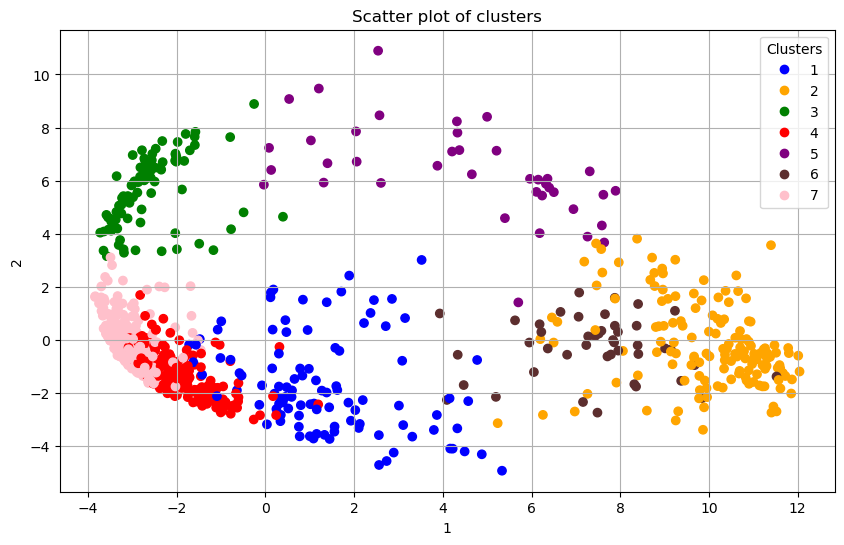

In [629]:
# Plotting
plt.figure(figsize=(10, 6))

# Define custom color palette
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', '#5C2E2E', 'pink']

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ts_pca_k[0], ts_pca_k[1], c=ts_pca_k['cluster'], cmap=plt.matplotlib.colors.ListedColormap(custom_colors))

# Adding legend
legend1 = scatter.legend_elements()
plt.legend(*legend1, title="Clusters")

# Adding labels and title
plt.xlabel('1')
plt.ylabel('2')
plt.title('Scatter plot of clusters')
plt.grid(True)
# Show plot
plt.show()

parlare solol della forma dei cluster

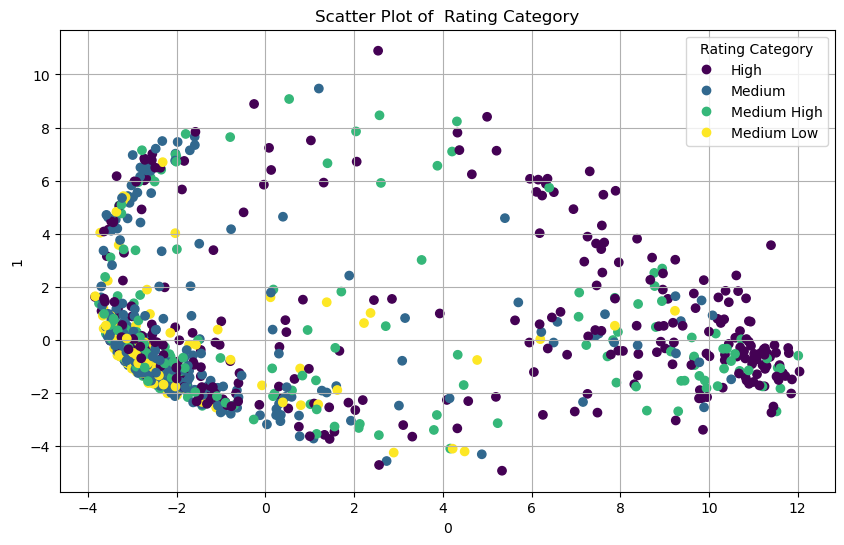

In [630]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumendo che ts_pca_v sia un DataFrame con colonne 0, 1 e 'rating_category'
categories = ts_pca_k['rating_category'].astype('category')
codes = categories.cat.codes
labels = categories.cat.categories

plt.figure(figsize=(10, 6))
scatter = plt.scatter(ts_pca_k[0], ts_pca_k[1], c=codes, cmap='viridis')

# Crea la legenda con le etichette reali
handles, _ = scatter.legend_elements()
plt.legend(handles, labels, title="Rating Category")

plt.xlabel('0')
plt.ylabel('1')
plt.title('Scatter Plot of  Rating Category')
plt.grid(True)
plt.show()

### UMAP

In [631]:
visual['cluster'] = clusterer.labels_
visual['rating_category'] = ts['rating_category']
visual

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,cluster,rating_category
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,4,High
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,1,High
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,1,High
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,6,High
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,0.759350,...,-0.589578,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,7,Medium
1130,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,1.868924,...,-0.695051,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,7,Medium
1131,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,0.670843,...,-0.479973,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,4,High
1132,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,-0.095978,...,-0.534486,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,4,High


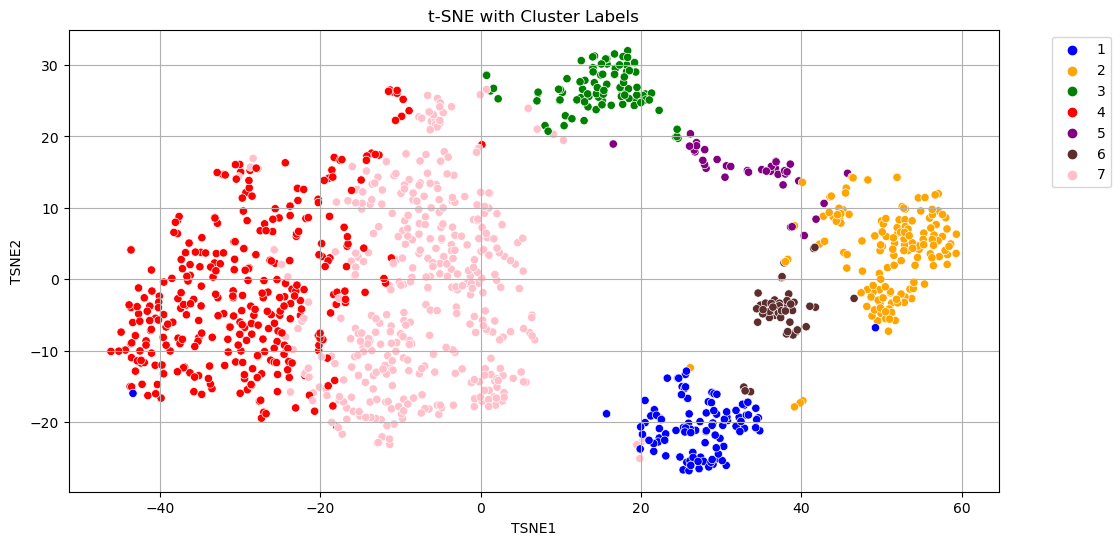

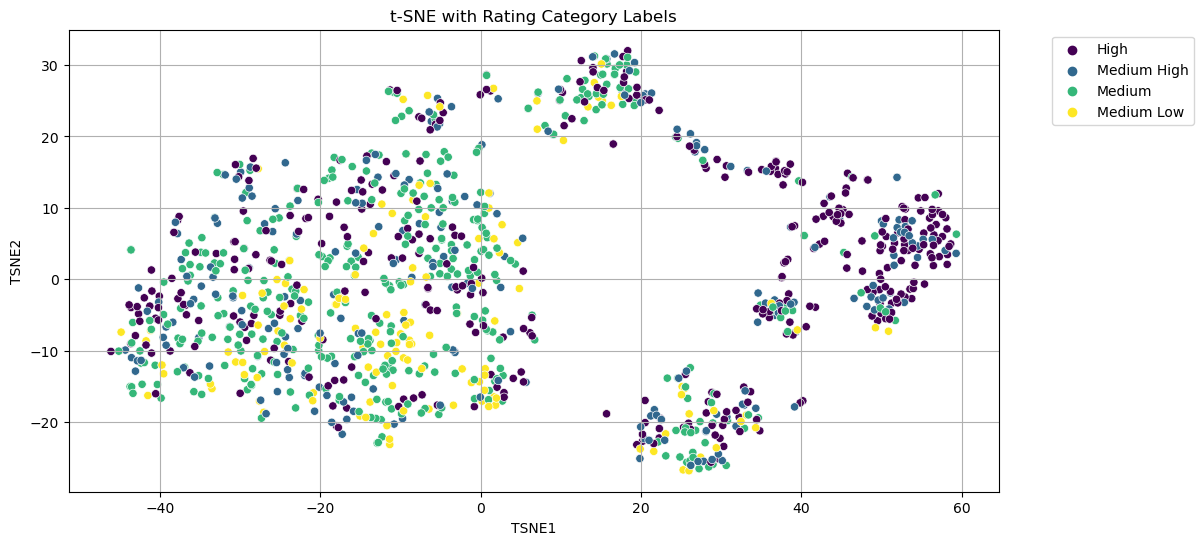

In [632]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and labels
features = visual.iloc[:, :-2]
cluster_labels = visual['cluster']
rating_labels = visual['rating_category']

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
embedding = tsne.fit_transform(features)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(embedding, columns=['TSNE1', 'TSNE2'])
embedding_df['cluster'] = cluster_labels
embedding_df['rating_category'] = rating_labels

# Plot t-SNE with cluster labels
plt.figure(figsize=(12, 6))
sns.scatterplot(data=embedding_df, x='TSNE1', y='TSNE2', hue='cluster', palette=custom_colors)
plt.title('t-SNE with Cluster Labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


custom_palette = ['#440154', '#31688E', '#35B779', '#FDE725']

# Plot t-SNE with rating category labels using custom palette
plt.figure(figsize=(12, 6))
sns.scatterplot(data=embedding_df, x='TSNE1', y='TSNE2', hue='rating_category', palette=custom_palette)
plt.title('t-SNE with Rating Category Labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Ricerca Cluster

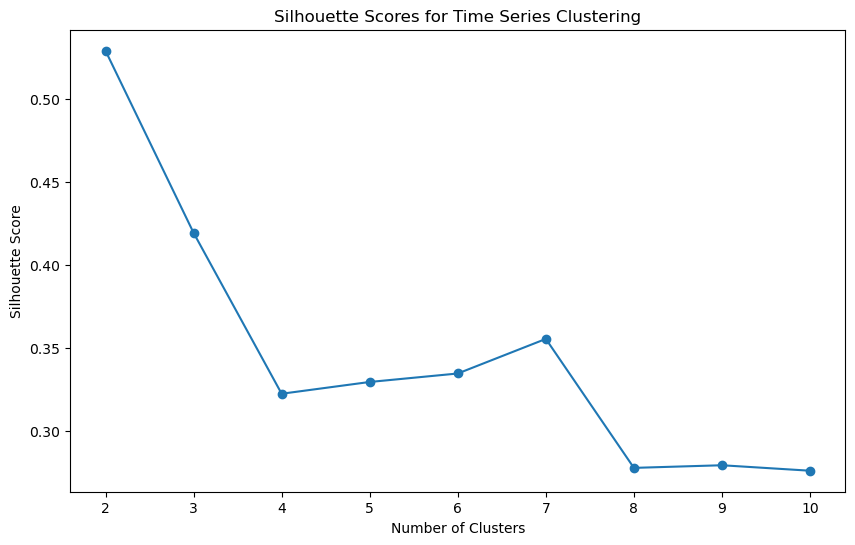

In [633]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Funzione per convertire i dati in formato 3D
def convert_to_numpy3D(data):
    return np.array(data).reshape((data.shape[0], data.shape[1], 1))

# Funzione per calcolare i silhouette score
def compute_silhouette_scores(data, min_clusters=2, max_clusters=10):
    silhouette_scores = []
    data_3d = convert_to_numpy3D(data)
    
    for k in range(min_clusters, max_clusters + 1):
        clusterer = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=42)
        cluster_labels = clusterer.fit_predict(data_3d)
        
        # Calcolo del silhouette score
        score = silhouette_score(data_3d.reshape(data_3d.shape[0], -1), cluster_labels, metric="euclidean")
        silhouette_scores.append(score)
    
    return silhouette_scores

# Calcolo dei silhouette score
silhouette_scores = compute_silhouette_scores(ts_numeric)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Time Series Clustering')
plt.show()

In [634]:
silhouette_scores

[0.5290143266602544,
 0.41942614695414276,
 0.32258605884885583,
 0.329672680817103,
 0.33477177152234544,
 0.35558453766515025,
 0.27797310485721416,
 0.2795537704022626,
 0.2762616145613545]

é stato provato sia dtw che euclidean, ma euclidean ha portato a cluster piu separati e definiti rispetto a dtw

### Prova distribuzioni classi

In [635]:
ts["cluster"] = clusterer.labels_
ts

,id,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,rating,genre,rating_category,cluster
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High,4
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High,1
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High,1
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High,6
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium,7
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium,7
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High,4
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High,4


In [636]:
ts['cluster'].unique()

array([4, 1, 6, 3, 7, 2, 5], dtype=int64)

In [637]:
# Calcola statistiche descrittive per ciascun cluster
cluster_stats = ts.groupby('cluster').describe()

# Visualizza le statistiche
cluster_stats


0                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
1        101.0  2.818579  0.911372  0.648820  2.331826  2.752876  3.409003   
2        147.0 -0.542628  0.542010 -1.277225 -0.876216 -0.713884 -0.338633   
3         88.0  2.261178  1.197278 -0.794657  1.525823  2.283831  3.194277   
4        324.0  3.409132  0.570329  1.185466  3.054754  3.504137  3.823574   
5         39.0 -0.186689  1.023609 -1.859255 -0.740416 -0.530801  0.076129   
6         44.0 -0.136717  0.824803 -1.430432 -0.619837 -0.296283  0.066009   
7        391.0  4.418797  0.734793  1.874764  4.010069  4.358187  4.833925   

                       1            ...        99           rating            \
              max  count      mean  ...       75%       max  count      mean   
cluster                             ...                                        
1        5.450308  101.0  3.031686  ... -0.014712  0.029155  101.0  6.567327   
2        1.959536  147.0 -0.541941  ... -0.064092  0.833489  147.0  7.261905   
3        4.603085   88.0  1.831105  ... -0.645974  0.038047   88.0  6.546591   
4        4.766910  324.0  3.666754  ... -0.642815 -0.499505  324.0  6.506790   
5        4.014017   39.0 -0.297409  ... -0.041793  1.214300   39.0  7.243590   
6        3.420437   44.0 -0.158835  ...  0.001776  0.054734   44.0  6.959091   
7        7.075269  391.0  4.062702  ... -0.538619  0.000749  391.0  6.300512   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
1        0.954684  4.3  6.0  6.6  7.2  8.7  
2        0.527118  5.3  6.9  7.3  7.6  8.5  
3        0.831278  4.0  6.1  6.5  7.1  8.7  
4        0.825719  4.0  6.0  6.5  7.1  8.5  
5        0.501469  5.9  7.0  7.3  7.5  8.2  
6        0.688550  4.8  6.6  7.0  7.4  8.3  
7        0.949980  2.8  5.7  6.3  6.9  8.5  

[7 rows x 808 columns]

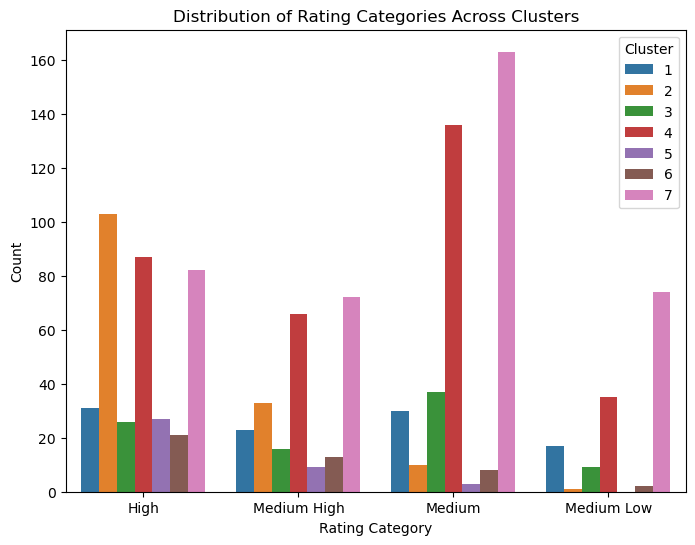

In [638]:

# Explode the 'genre' column to have one genre per row
#ts_exploded = ts.explode('rating_category')

# Plot the distribution of rating categories across clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=ts, x='rating_category', hue='cluster')
plt.title('Distribution of Rating Categories Across Clusters')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


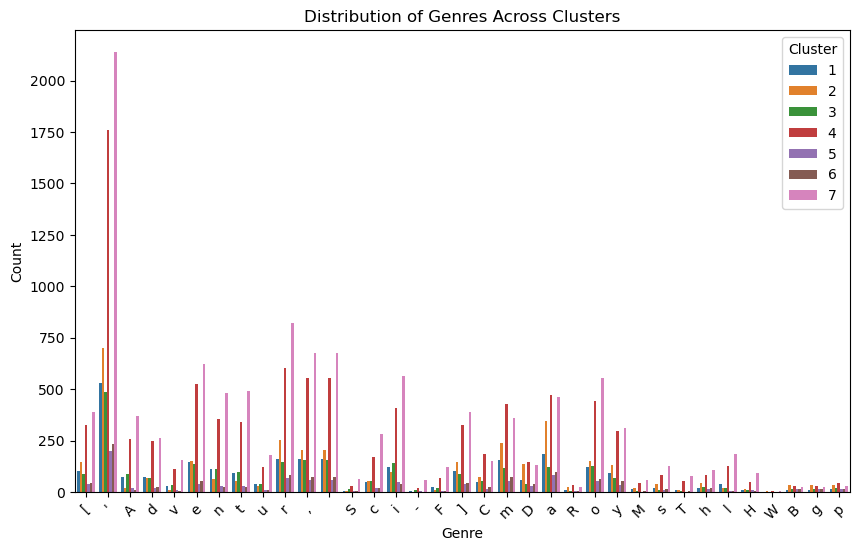

In [639]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create a list of tuples (cluster, genre)
cluster_genre_list = [(cluster, genre) for cluster, genres in zip(ts['cluster'], ts['genre']) for genre in genres]

# Count the occurrences of each (cluster, genre) pair
cluster_genre_count = Counter(cluster_genre_list)

# Convert the Counter object to a DataFrame for plotting
genre_cluster_df = pd.DataFrame(cluster_genre_count.items(), columns=['cluster_genre', 'count'])
genre_cluster_df[['cluster', 'genre']] = pd.DataFrame(genre_cluster_df['cluster_genre'].tolist(), index=genre_cluster_df.index)
genre_cluster_df = genre_cluster_df.drop(columns=['cluster_genre'])

# Plot the distribution of genres across clusters
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_cluster_df, x='genre', y='count', hue='cluster')
plt.title('Distribution of Genres Across Clusters')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()



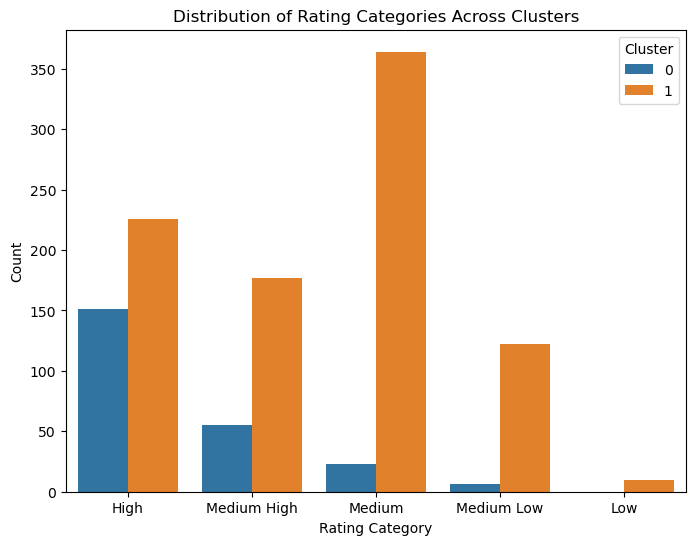

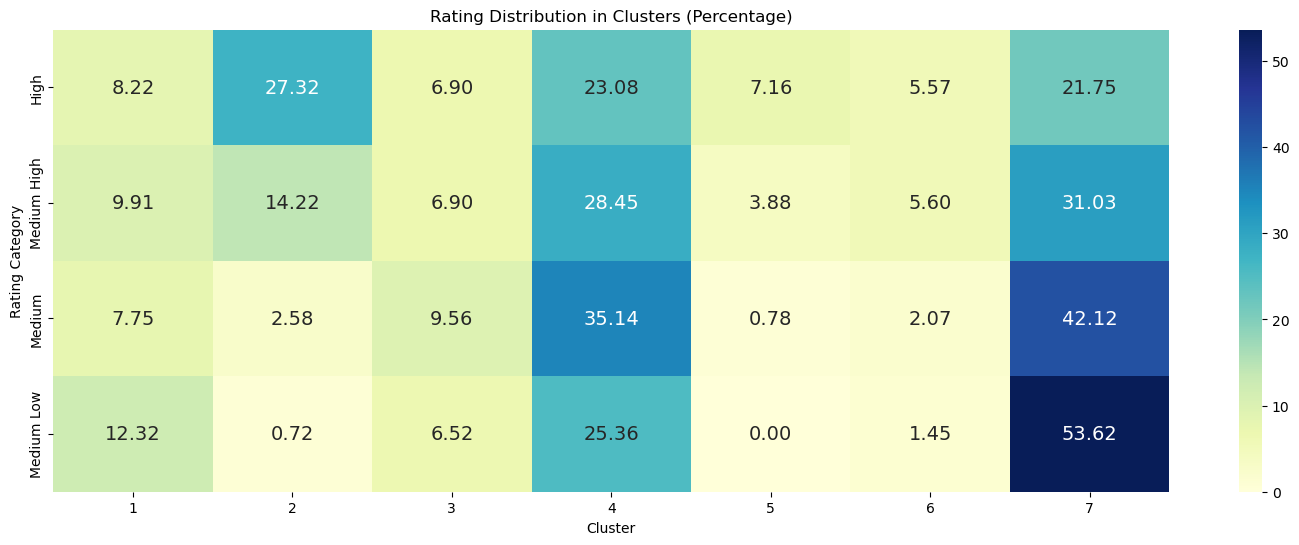


Cluster Purity by Rating Category:
cluster
1    0.322420
2    0.609112
3    0.320018
4    0.313686
5    0.606095
6    0.381441
7    0.361033
dtype: float64


In [640]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione delle categorie di rating per cluster
rating_distribution = ts.groupby(['rating_category', 'cluster']).size().unstack(fill_value=0)

# Reorder the rows so that 'medium' appears before 'medium high'
rating_distribution = rating_distribution.reindex(['High', 'Medium High', 'Medium', 'Medium Low'])

# Converte i conteggi in percentuali rispetto al totale per ciascuna categoria di rating
rating_distribution_percentage = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

# Crea la heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(rating_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu', annot_kws={"size": 14})
plt.title('Rating Distribution in Clusters (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Rating Category')
plt.show()

# Calculate cluster purity for rating category
rating_purity = rating_distribution_percentage.max(axis=0) / rating_distribution_percentage.sum(axis=0)

print("\nCluster Purity by Rating Category:")
print(rating_purity)

In [641]:
rating_purity.mean()

0.4162579899734401

In [642]:
import pandas as pd
from ast import literal_eval

ts_gen = ts

# Convert the genre column from string representation of list to actual list
ts_gen['genre'] = ts_gen['genre'].apply(literal_eval)

# Create a new DataFrame with binary columns for each genre
genres = set(g for sublist in ts_gen['genre'] for g in sublist)
for genre in genres:
    ts_gen[genre] = ts_gen['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genre column
ts_gen = ts_gen.drop(columns=['genre'])

ts_gen

,id,0,1,2,3,4,5,6,7,8,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,0,0,0,0,0,1,0,1,0,0
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,0,0,1,0,0,0,0,0,1,0
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,0,0,0,0,0,0,0,0,0,0
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,0,0,0,0,0,1,0,1,0,0
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,1,0,0,1,0,0,0,0,0,0
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,0,0,0,0,0,0,0,0,0,0
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,0,0,0,1,0,0,0,0,0,0
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,0,0,0,0,0,0,0,0,0,1


In [729]:
ts_gen['Short'].sum()

2

In [643]:

ts_gen.iloc[:, -22:]


,Short,Music,Comedy,Horror,Documentary,Drama,Action,Fantasy,Biography,Animation,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1130,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1132,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [644]:
ts_gen.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'Mystery', 'Western', 'Romance', 'Thriller', 'Sport', 'Sci-Fi',
       'Musical', 'Adventure', 'Crime', 'History'],
      dtype='object', length=126)

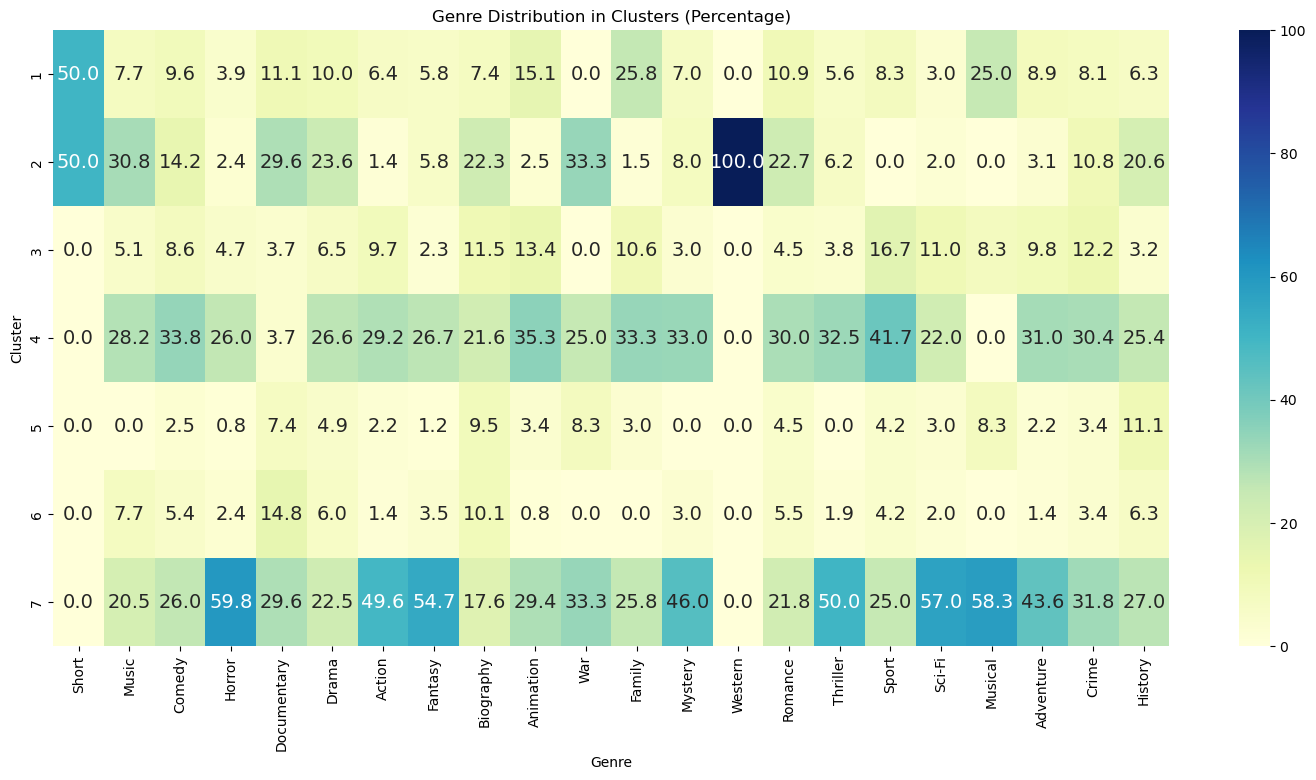

Cluster Purity by Genre:
cluster
1    0.211808
2    0.255822
3    0.112099
4    0.077800
5    0.139093
6    0.185843
7    0.082066
dtype: float64


In [645]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione dei generi per cluster
genre_columns = ts_gen.columns[-22:]
genre_distribution = ts_gen.groupby('cluster')[genre_columns].sum()

# Converte i conteggi in percentuali rispetto al totale per ciascun genere
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=0), axis=1) * 100

# Crea la heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(genre_distribution_percentage, annot=True, fmt='.1f', cmap='YlGnBu', annot_kws={"size": 14})
plt.title('Genre Distribution in Clusters (Percentage)')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

# Calcola la purity per ciascun genere
genre_purity = genre_distribution_percentage.max(axis=1) / genre_distribution_percentage.sum(axis=1)

print("Cluster Purity by Genre:")
print(genre_purity)

In [646]:
genre_purity.mean()

0.15207590491795034

## Feature Based

### TSFresh

#### WITHOUT PCA

In [647]:
# !pip install -r requirements.txt

In [648]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [649]:
ts = pd.read_csv("ts_transformed.csv")

ts['rating_category'] = ts['rating_category'].replace('Low', 'Medium Low')

In [650]:
# ts_numeric = ts.drop(columns=['id', 'rating', 'genre', 'rating_category'])
ts_numeric = ts_numeric.drop(columns=['cluster'])

In [651]:
ts_f = TSFreshFeatureExtractor(default_fc_parameters="comprehensive", show_warnings=False, disable_progressbar=True)

# Convertiamo il DataFrame in un array NumPy 3D con forma (n_istanze, 1, n_timepoint)
def convert_to_numpy3D(df):
    return np.expand_dims(df.values, axis=1)

# Applichiamo la conversione
ts_numeric = convert_to_numpy3D(ts_numeric)

ts_ftransform = ts_f.fit_transform(ts_numeric)
ts_ftransform

,var_0__variance_larger_than_standard_deviation,var_0__has_duplicate_max,var_0__has_duplicate_min,var_0__has_duplicate,var_0__sum_values,var_0__abs_energy,var_0__mean_abs_change,var_0__mean_change,var_0__mean_second_derivative_central,var_0__median,...,var_0__fourier_entropy__bins_5,var_0__fourier_entropy__bins_10,var_0__fourier_entropy__bins_100,var_0__permutation_entropy__dimension_3__tau_1,var_0__permutation_entropy__dimension_4__tau_1,var_0__permutation_entropy__dimension_5__tau_1,var_0__permutation_entropy__dimension_6__tau_1,var_0__permutation_entropy__dimension_7__tau_1,var_0__query_similarity_count__query_None__threshold_0.0,var_0__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,6.217249e-15,99.000000,0.282349,-0.031322,-0.002650,-0.198324,...,0.481199,0.761938,1.798421,1.486533,2.348272,3.195896,3.914061,4.257520,0.0,2.823046
1,0.0,0.0,0.0,1.0,-2.220446e-16,99.000000,0.370024,-0.017788,-0.003766,-0.344959,...,0.575228,1.118198,2.064832,1.458521,2.279099,3.081381,3.798828,4.190274,0.0,2.414896
2,0.0,0.0,0.0,0.0,1.782011e+01,54.262133,0.146584,-0.026174,0.001495,0.036319,...,0.604187,0.929743,1.310476,1.463895,2.295930,3.063555,3.726477,4.169223,0.0,2.098965
3,1.0,0.0,0.0,0.0,2.397208e+00,111.916867,0.467317,-0.034331,0.009627,-0.301354,...,0.319026,0.518641,1.220334,1.242043,1.833542,2.342994,2.806321,3.178314,0.0,2.935552
4,0.0,0.0,0.0,0.0,3.663736e-15,99.000000,0.116081,-0.048355,0.004823,-0.494929,...,0.192626,0.192626,0.810494,1.391749,2.147101,2.824659,3.407815,3.878619,0.0,2.604278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,0.0,0.0,0.0,1.665335e-15,99.000000,0.096308,-0.047717,0.000365,-0.452917,...,0.192626,0.192626,0.545824,1.336025,2.042741,2.690190,3.236161,3.672530,0.0,3.068717
1130,0.0,0.0,0.0,1.0,4.329870e-15,99.000000,0.173610,-0.036302,-0.000315,-0.630160,...,0.192626,0.288342,0.761435,1.474770,2.320502,3.066160,3.802100,4.179141,0.0,2.659794
1131,0.0,0.0,0.0,0.0,1.776357e-15,99.000000,0.180034,-0.050054,0.001288,-0.428689,...,0.356468,0.451359,1.102479,1.353975,2.073170,2.680802,3.207523,3.614821,0.0,2.870955
1132,0.0,0.0,0.0,1.0,1.110223e-16,99.000000,0.167555,-0.033351,-0.002839,-0.335559,...,0.288342,0.383650,0.854598,1.443981,2.191501,2.943808,3.546587,3.844293,0.0,3.240705


In [652]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ts_fscaled = scaler.fit_transform(ts_ftransform)

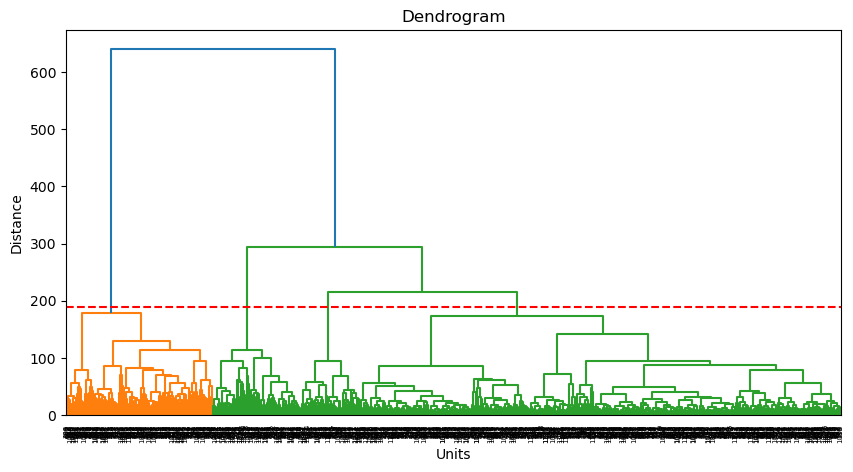

Cluster ottenuti con taglio a 1.5: [2 2 2 ... 4 4 2]


In [653]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calcolo del linkage
Z = linkage(ts_fscaled, method='ward')

# Visualizzazione del dendrogramma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Units")
plt.ylabel("Distance")

# Aggiunta della linea orizzontale all'altezza 1.5
plt.axhline(y=190, color='r', linestyle='--')

plt.show()

# Taglio del dendrogramma per ottenere i cluster
clusters_g = fcluster(Z, t= 190, criterion='distance')

# Valutazione dei cluster ottenuti
print(f"Cluster ottenuti con taglio a 1.5: {clusters_g}")

In [654]:
silhouette_avg = silhouette_score(ts_fscaled, clusters_g)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2794


In [655]:
ts_g = ts
ts_g["cluster"] = clusters_g
ts_g

,id,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,rating,genre,rating_category,cluster
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High,2
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High,2
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High,2
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High,2
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium,4
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium,4
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High,4
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High,4


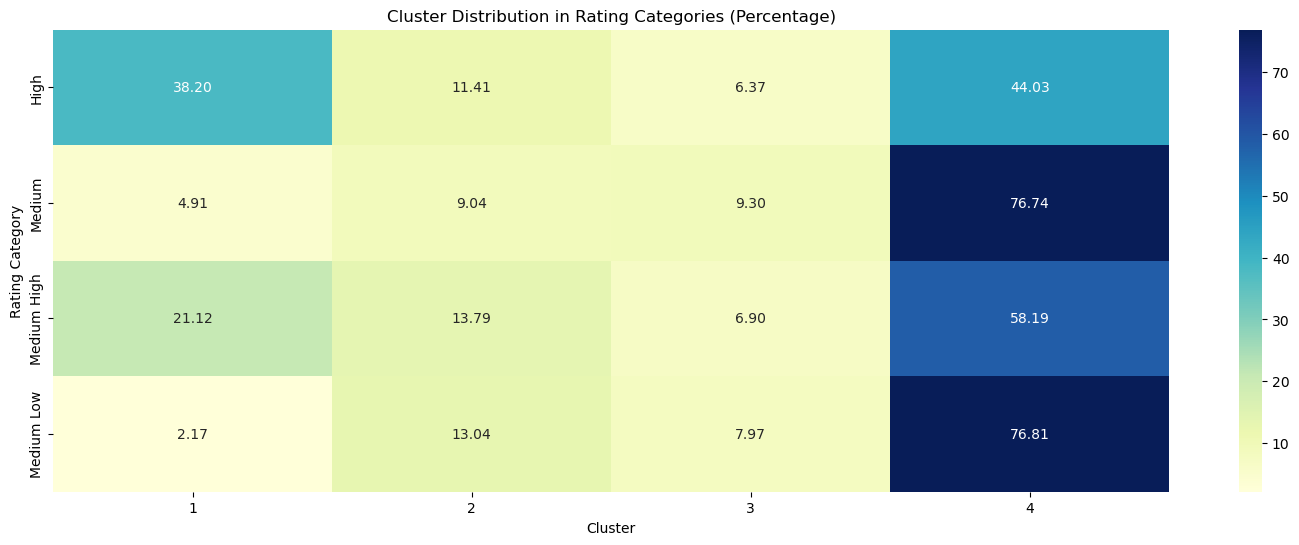


Cluster Purity by Rating Category:
cluster
1    0.575241
2    0.291693
3    0.304635
4    0.300307
dtype: float64


In [656]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione delle categorie di rating per cluster
rating_distribution = ts_g.groupby(['rating_category', 'cluster']).size().unstack(fill_value=0)

# Converte i conteggi in percentuali rispetto al totale per ciascuna categoria di rating
rating_distribution_percentage = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

# Crea la heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(rating_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cluster Distribution in Rating Categories (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Rating Category')
plt.show()

# Calculate cluster purity for rating category
rating_purity = rating_distribution_percentage.max(axis=0) / rating_distribution_percentage.sum(axis=0)

print("\nCluster Purity by Rating Category:")
print(rating_purity)

In [657]:
rating_purity.mean()

0.3679691078376358

In [658]:
import pandas as pd
from ast import literal_eval

ts_gen = ts_g

# Convert the genre column from string representation of list to actual list
ts_gen['genre'] = ts_gen['genre'].apply(literal_eval)

# Create a new DataFrame with binary columns for each genre
genres = set(g for sublist in ts_gen['genre'] for g in sublist)
for genre in genres:
    ts_gen[genre] = ts_gen['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genre column
ts_gen = ts_gen.drop(columns=['genre'])

ts_gen

,id,0,1,2,3,4,5,6,7,8,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,0,0,0,0,0,1,0,1,0,0
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,0,0,1,0,0,0,0,0,1,0
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,0,0,0,0,0,0,0,0,0,0
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,0,0,0,0,0,1,0,1,0,0
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,1,0,0,1,0,0,0,0,0,0
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,0,0,0,0,0,0,0,0,0,0
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,0,0,0,1,0,0,0,0,0,0
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,0,0,0,0,0,0,0,0,0,1


In [659]:

ts_gen.iloc[:, -22:]


,Short,Music,Comedy,Horror,Documentary,Drama,Action,Fantasy,Biography,Animation,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1130,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1132,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [660]:
ts_gen.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'Mystery', 'Western', 'Romance', 'Thriller', 'Sport', 'Sci-Fi',
       'Musical', 'Adventure', 'Crime', 'History'],
      dtype='object', length=126)

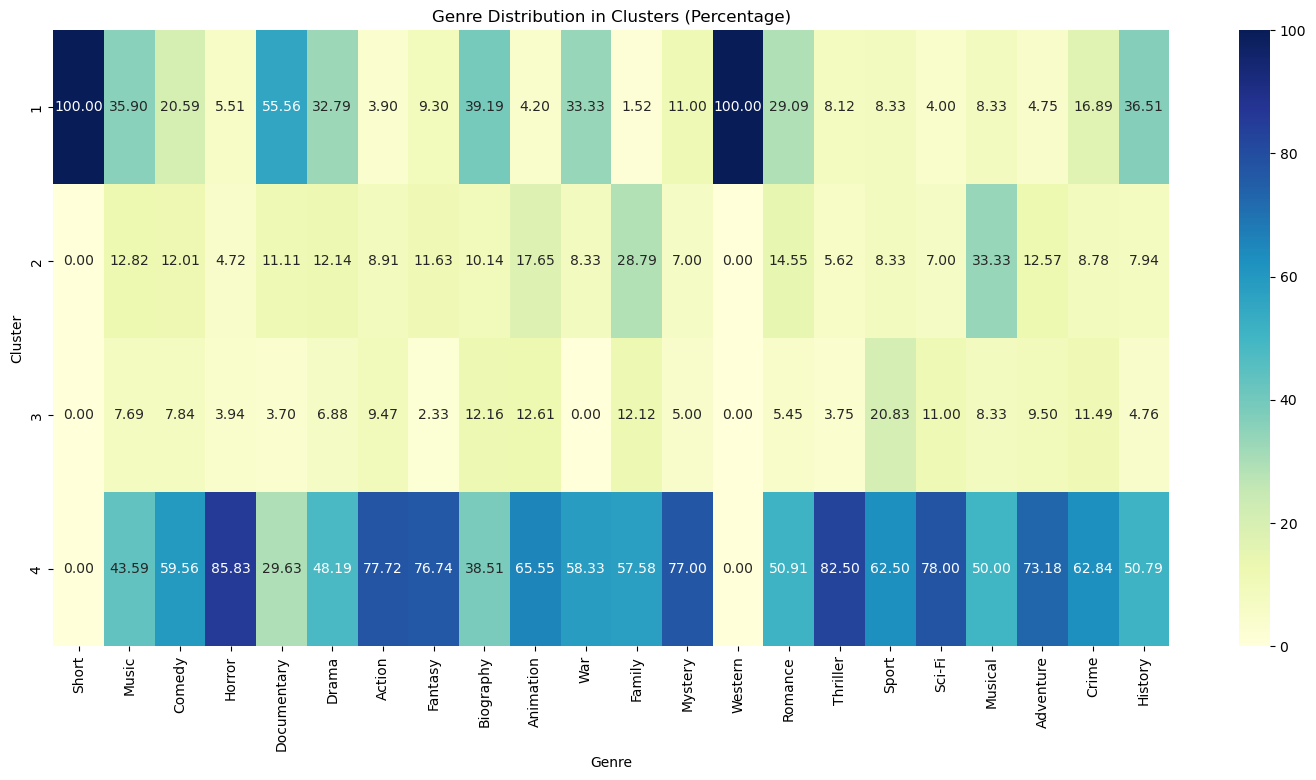

Cluster Purity by Genre:
cluster
1    0.175804
2    0.136962
3    0.131141
4    0.069838
dtype: float64


In [661]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione dei generi per cluster
genre_columns = ts_gen.columns[-22:]
genre_distribution = ts_gen.groupby('cluster')[genre_columns].sum()

# Converte i conteggi in percentuali rispetto al totale per ciascun genere
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=0), axis=1) * 100

# Crea la heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(genre_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Genre Distribution in Clusters (Percentage)')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

# Calcola la purity per ciascun genere
genre_purity = genre_distribution_percentage.max(axis=1) / genre_distribution_percentage.sum(axis=1)

print("Cluster Purity by Genre:")
print(genre_purity)

In [662]:
genre_purity.mean()

0.128436332782193

#### WITH PCA

In [663]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [664]:
ts = pd.read_csv("ts_transformed.csv")

ts['rating_category'] = ts['rating_category'].replace('Low', 'Medium Low')

In [665]:
ts_numeric = ts.drop(columns=['id', 'rating', 'genre', 'rating_category'])

train, test = train_test_split(ts_numeric, test_size = 2, random_state = 42)

In [666]:
ts_f = TSFreshFeatureExtractor(default_fc_parameters="comprehensive", show_warnings=False, disable_progressbar=True)

# Convertiamo il DataFrame in un array NumPy 3D con forma (n_istanze, 1, n_timepoint)
def convert_to_numpy3D(df):
    return np.expand_dims(df.values, axis=1)

# Applichiamo la conversione
ts_numeric = convert_to_numpy3D(ts_numeric)



In [667]:
ts_ftransform = ts_f.fit_transform(ts_numeric)
ts_ftransform

,var_0__variance_larger_than_standard_deviation,var_0__has_duplicate_max,var_0__has_duplicate_min,var_0__has_duplicate,var_0__sum_values,var_0__abs_energy,var_0__mean_abs_change,var_0__mean_change,var_0__mean_second_derivative_central,var_0__median,...,var_0__fourier_entropy__bins_5,var_0__fourier_entropy__bins_10,var_0__fourier_entropy__bins_100,var_0__permutation_entropy__dimension_3__tau_1,var_0__permutation_entropy__dimension_4__tau_1,var_0__permutation_entropy__dimension_5__tau_1,var_0__permutation_entropy__dimension_6__tau_1,var_0__permutation_entropy__dimension_7__tau_1,var_0__query_similarity_count__query_None__threshold_0.0,var_0__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,6.217249e-15,99.000000,0.282349,-0.031322,-0.002650,-0.198324,...,0.481199,0.761938,1.798421,1.486533,2.348272,3.195896,3.914061,4.257520,0.0,2.823046
1,0.0,0.0,0.0,1.0,-2.220446e-16,99.000000,0.370024,-0.017788,-0.003766,-0.344959,...,0.575228,1.118198,2.064832,1.458521,2.279099,3.081381,3.798828,4.190274,0.0,2.414896
2,0.0,0.0,0.0,0.0,1.782011e+01,54.262133,0.146584,-0.026174,0.001495,0.036319,...,0.604187,0.929743,1.310476,1.463895,2.295930,3.063555,3.726477,4.169223,0.0,2.098965
3,1.0,0.0,0.0,0.0,2.397208e+00,111.916867,0.467317,-0.034331,0.009627,-0.301354,...,0.319026,0.518641,1.220334,1.242043,1.833542,2.342994,2.806321,3.178314,0.0,2.935552
4,0.0,0.0,0.0,0.0,3.663736e-15,99.000000,0.116081,-0.048355,0.004823,-0.494929,...,0.192626,0.192626,0.810494,1.391749,2.147101,2.824659,3.407815,3.878619,0.0,2.604278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,0.0,0.0,0.0,1.665335e-15,99.000000,0.096308,-0.047717,0.000365,-0.452917,...,0.192626,0.192626,0.545824,1.336025,2.042741,2.690190,3.236161,3.672530,0.0,3.068717
1130,0.0,0.0,0.0,1.0,4.329870e-15,99.000000,0.173610,-0.036302,-0.000315,-0.630160,...,0.192626,0.288342,0.761435,1.474770,2.320502,3.066160,3.802100,4.179141,0.0,2.659794
1131,0.0,0.0,0.0,0.0,1.776357e-15,99.000000,0.180034,-0.050054,0.001288,-0.428689,...,0.356468,0.451359,1.102479,1.353975,2.073170,2.680802,3.207523,3.614821,0.0,2.870955
1132,0.0,0.0,0.0,1.0,1.110223e-16,99.000000,0.167555,-0.033351,-0.002839,-0.335559,...,0.288342,0.383650,0.854598,1.443981,2.191501,2.943808,3.546587,3.844293,0.0,3.240705


In [668]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ts_fscaled = scaler.fit_transform(ts_ftransform)

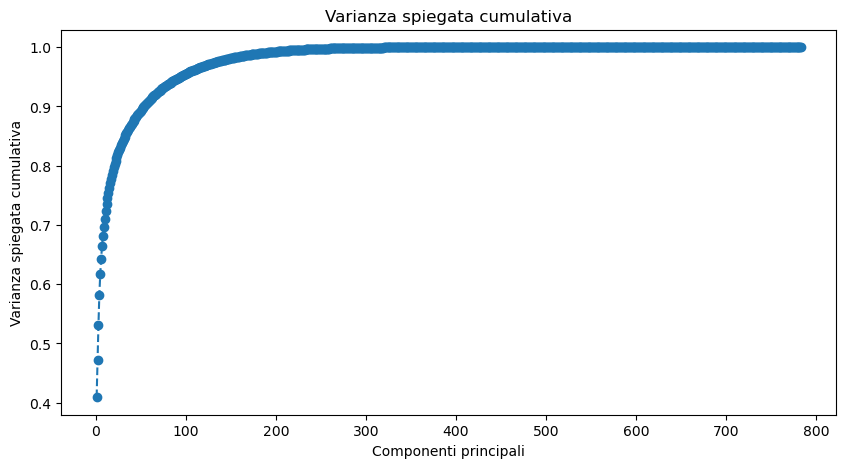

Componente 1: 0.4093
Componente 2: 0.4729
Componente 3: 0.5304
Componente 4: 0.5816
Componente 5: 0.6171
Componente 6: 0.6431
Componente 7: 0.6648
Componente 8: 0.6818
Componente 9: 0.6972
Componente 10: 0.7105
Componente 11: 0.7232
Componente 12: 0.7352
Componente 13: 0.7454
Componente 14: 0.7546
Componente 15: 0.7630
Componente 16: 0.7707
Componente 17: 0.7782
Componente 18: 0.7851
Componente 19: 0.7916
Componente 20: 0.7975
Componente 21: 0.8031
Componente 22: 0.8086
Componente 23: 0.8136
Componente 24: 0.8183
Componente 25: 0.8227
Componente 26: 0.8268
Componente 27: 0.8307
Componente 28: 0.8345
Componente 29: 0.8381
Componente 30: 0.8415
Componente 31: 0.8449
Componente 32: 0.8482
Componente 33: 0.8514
Componente 34: 0.8545
Componente 35: 0.8575
Componente 36: 0.8605
Componente 37: 0.8633
Componente 38: 0.8660
Componente 39: 0.8686
Componente 40: 0.8711
Componente 41: 0.8735
Componente 42: 0.8759
Componente 43: 0.8782
Componente 44: 0.8805
Componente 45: 0.8827
Componente 46: 0.88

In [669]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
pca = PCA()
ts_pca = pca.fit_transform(ts_fscaled)

# Varianza spiegata per ciascuna componente
explained_variance = pca.explained_variance_ratio_

# Varianza spiegata cumulativa
cumulative_variance = explained_variance.cumsum()

# Grafico della varianza spiegata cumulativa
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza spiegata cumulativa')
plt.xlabel('Componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.show()

# Stampa la varianza spiegata cumulativa
for i, var in enumerate(cumulative_variance):
    print(f"Componente {i+1}: {var:.4f}")

In [670]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
pca = PCA(n_components=6)
ts_pca = pca.fit_transform(ts_fscaled)

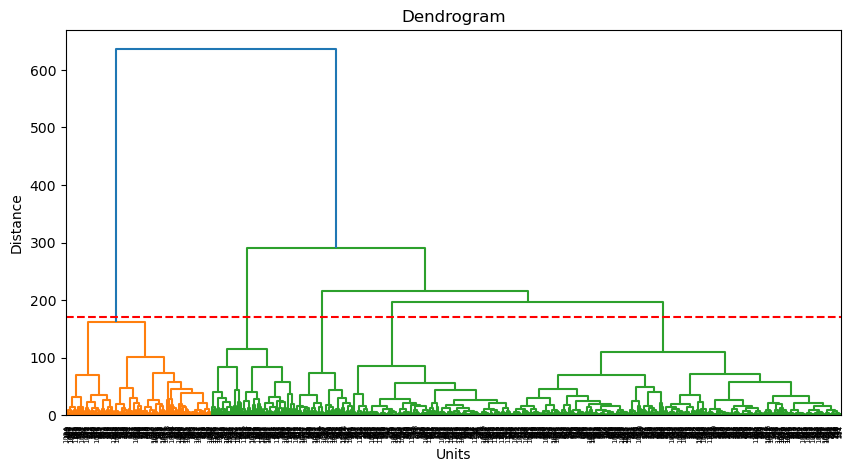

Cluster ottenuti con taglio a 1.5: [5 1 2 ... 5 5 2]


In [671]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calcolo del linkage
Z = linkage(ts_pca, method='ward')

# Visualizzazione del dendrogramma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Units")
plt.ylabel("Distance")

# Aggiunta della linea orizzontale all'altezza 1.5
plt.axhline(y=170, color='r', linestyle='--')

plt.show()

# Taglio del dendrogramma per ottenere i cluster
clusters_g = fcluster(Z, t= 170, criterion='distance')

# Valutazione dei cluster ottenuti
print(f"Cluster ottenuti con taglio a 1.5: {clusters_g}")

In [672]:
silhouette_avg = silhouette_score(ts_pca, clusters_g)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3199


In [673]:
ts_g = ts.copy()
ts_g["cluster"] = clusters_g
ts_g

,id,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,rating,genre,rating_category,cluster
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High,5
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High,1
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High,2
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High,1
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium,4
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium,5
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High,5
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High,5


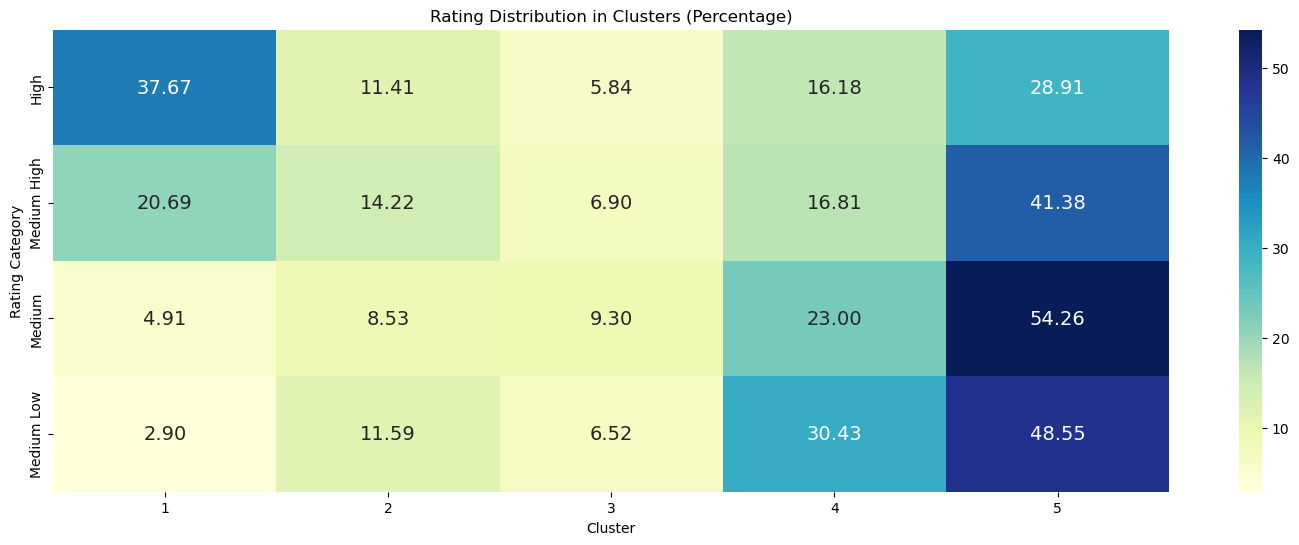


Cluster Purity by Rating Category:
cluster
1    0.569283
2    0.310901
3    0.325755
4    0.352161
5    0.313470
dtype: float64


In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione delle categorie di rating per cluster
rating_distribution = ts_g.groupby(['rating_category', 'cluster']).size().unstack(fill_value=0)

rating_distribution = rating_distribution.reindex(['High', 'Medium High', 'Medium', 'Medium Low'])

# Converte i conteggi in percentuali rispetto al totale per ciascuna categoria di rating
rating_distribution_percentage = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

# Crea la heatmap
plt.figure(figsize=(18, 6))

sns.heatmap(rating_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu', annot_kws={"size": 14})

plt.title('Rating Distribution in Clusters (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Rating Category')
plt.show()

# Calculate cluster purity for rating category
rating_purity = rating_distribution_percentage.max(axis=0) / rating_distribution_percentage.sum(axis=0)

print("\nCluster Purity by Rating Category:")
print(rating_purity)

In [675]:
rating_purity.mean()

0.374314151108495

In [676]:
import pandas as pd
from ast import literal_eval

ts_gen = ts_g.copy()

# Convert the genre column from string representation of list to actual list
ts_gen['genre'] = ts_gen['genre'].apply(literal_eval)

# Create a new DataFrame with binary columns for each genre
genres = set(g for sublist in ts_gen['genre'] for g in sublist)
for genre in genres:
    ts_gen[genre] = ts_gen['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genre column
ts_gen = ts_gen.drop(columns=['genre'])

ts_gen

,id,0,1,2,3,4,5,6,7,8,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,0,0,0,0,0,1,0,1,0,0
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,0,0,1,0,0,0,0,0,1,0
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,0,0,0,0,0,0,0,0,0,0
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,0,0,0,0,0,1,0,1,0,0
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,1,0,0,1,0,0,0,0,0,0
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,0,0,0,0,0,0,0,0,0,0
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,0,0,0,1,0,0,0,0,0,0
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,0,0,0,0,0,0,0,0,0,1


In [677]:

ts_gen.iloc[:, -22:]


,Short,Music,Comedy,Horror,Documentary,Drama,Action,Fantasy,Biography,Animation,...,Mystery,Western,Romance,Thriller,Sport,Sci-Fi,Musical,Adventure,Crime,History
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1130,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1132,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [678]:
ts_gen.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'Mystery', 'Western', 'Romance', 'Thriller', 'Sport', 'Sci-Fi',
       'Musical', 'Adventure', 'Crime', 'History'],
      dtype='object', length=126)

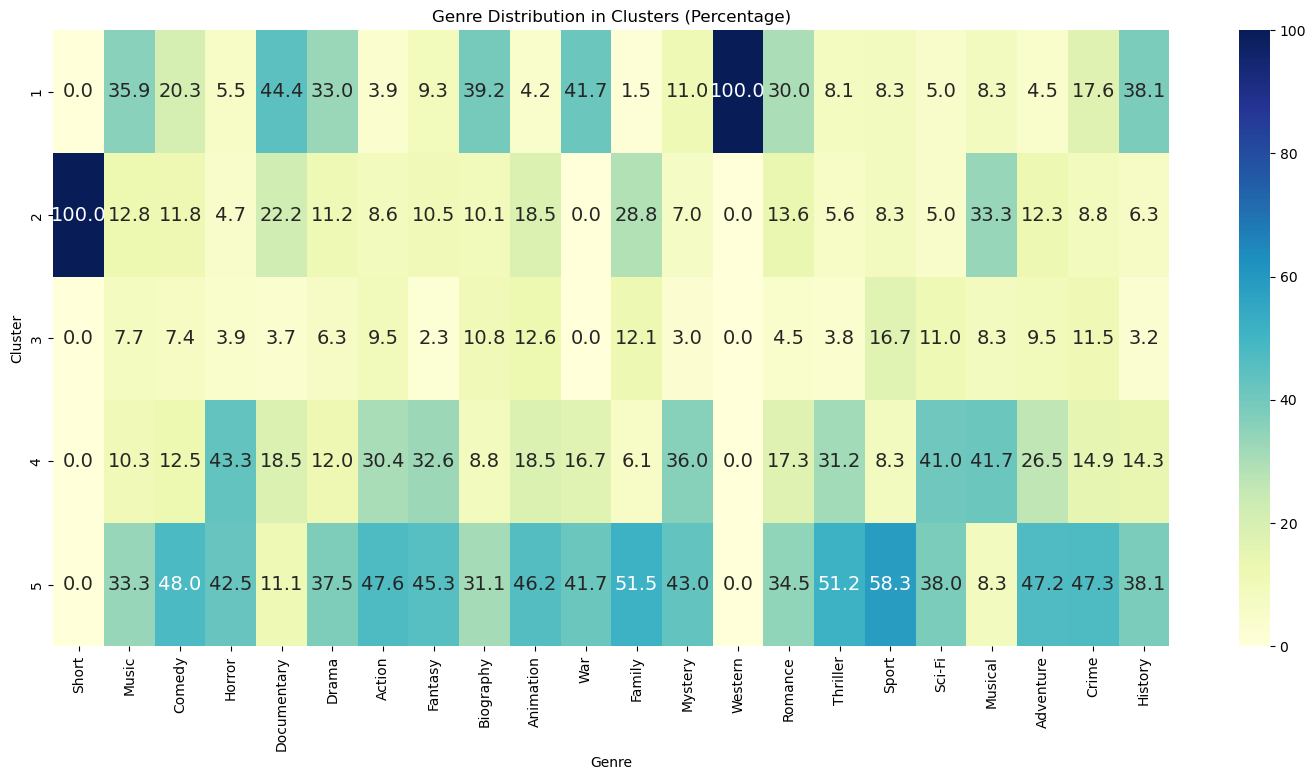

Cluster Purity by Genre:
cluster
1    0.212826
2    0.294442
3    0.112755
4    0.098276
5    0.072732
dtype: float64


In [679]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione dei generi per cluster
genre_columns = ts_gen.columns[-22:]
genre_distribution = ts_gen.groupby('cluster')[genre_columns].sum()

# Converte i conteggi in percentuali rispetto al totale per ciascun genere
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=0), axis=1) * 100

# Crea la heatmap
plt.figure(figsize=(18, 8))

sns.heatmap(genre_distribution_percentage, annot=True, fmt='.1f', cmap='YlGnBu', annot_kws={"size": 14})
plt.title('Genre Distribution in Clusters (Percentage)')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

# Calcola la purity per ciascun genere
genre_purity = genre_distribution_percentage.max(axis=1) / genre_distribution_percentage.sum(axis=1)

print("Cluster Purity by Genre:")
print(genre_purity)

In [680]:
genre_purity.mean()

0.15820625758012619

Con la pca le purity aumentano del 3%.  
  
Anche se clustering con kmeans ha portato a una purity leggermente piu alta comunque sembra che la feature base con pca abbia le classi distribuite meglio all'interno dei cluster.

In [681]:
ts_g

,id,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,rating,genre,rating_category,cluster
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High,5
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High,1
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High,2
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High,1
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium,4
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium,5
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High,5
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High,5


In [682]:
# Calcola la media di ciascuna serie temporale, escludendo le colonne non numeriche
ts_g['mean'] = ts_g.drop(columns=['id', 'rating', 'genre', 'rating_category', 'cluster']).mean(axis=1)

# Statistiche descrittive delle medie delle serie temporali per cluster
cluster_stats_mean = ts_g.groupby('cluster')['mean'].describe()

# Statistiche descrittive del rating per cluster
cluster_stats_rating = ts_g.groupby('cluster')['rating'].describe()

# Visualizza i risultati
print("Statistiche delle medie delle serie temporali per cluster:")
print(cluster_stats_mean)

print("\nStatistiche del rating per cluster:")
print(cluster_stats_rating)

Statistiche delle medie delle serie temporali per cluster:
         count          mean           std           min           25%  \
cluster                                                                  
1        213.0 -9.756988e-02  6.043424e-02 -2.210823e-01 -1.395870e-01   
2        125.0  2.094315e-01  7.080733e-02 -3.203878e-02  1.729973e-01   
3         83.0  2.937409e-17  1.362222e-16 -3.408385e-16 -5.551115e-17   
4        231.0  2.684241e-17  9.885532e-17 -2.275957e-16 -4.662937e-17   
5        482.0  8.176954e-18  1.113401e-16 -4.396483e-16 -7.105427e-17   

                  50%           75%           max  
cluster                                            
1       -1.112273e-01 -6.073927e-02  6.130916e-02  
2        2.238608e-01  2.538867e-01  3.433632e-01  
3        3.441691e-17  1.065814e-16  5.173639e-16  
4        2.331468e-17  9.270362e-17  3.030909e-16  
5        7.771561e-18  8.104628e-17  3.208545e-16  

Statistiche del rating per cluster:
         count      m

In [683]:
cluster_stats_mean

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,213.0,-9.756988e-02,6.043424e-02,-2.210823e-01,-1.395870e-01,-1.112273e-01,-6.073927e-02,6.130916e-02
2,125.0,2.094315e-01,7.080733e-02,-3.203878e-02,1.729973e-01,2.238608e-01,2.538867e-01,3.433632e-01
3,83.0,2.937409e-17,1.362222e-16,-3.408385e-16,-5.551115e-17,3.441691e-17,1.065814e-16,5.173639e-16
4,231.0,2.684241e-17,9.885532e-17,-2.275957e-16,-4.662937e-17,2.331468e-17,9.270362e-17,3.030909e-16
5,482.0,8.176954e-18,1.113401e-16,-4.396483e-16,-7.105427e-17,7.771561e-18,8.104628e-17,3.208545e-16


In [684]:
cluster_stats_rating

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,213.0,7.204225,0.585784,4.8,6.90,7.3,7.6,8.5
2,125.0,6.688000,0.912158,4.3,6.20,6.8,7.3,8.7
3,83.0,6.463855,0.926780,2.8,5.90,6.5,7.1,8.7
4,231.0,6.403030,0.945810,3.3,5.85,6.4,7.1,8.5
5,482.0,6.392531,0.860732,3.1,5.90,6.4,7.0,8.5


## Cluster Visualization

### PCA

In [685]:
ts_fscaled_df = pd.DataFrame(ts_fscaled)
ts_fscaled_df['cluster'] = ts_g['cluster']
ts_fscaled_df['rating_category'] = ts_g['rating_category']
ts_fscaled_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,cluster,rating_category
0,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,1.312027,0.125167,-1.128125,0.769693,...,2.783192,1.854766,2.160544,2.652144,2.990324,2.586081,0.0,0.120566,5,High
1,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,2.456624,0.772383,-1.541294,-0.159334,...,3.652298,1.325125,1.506910,1.927914,2.407828,2.256387,0.0,-0.924242,1,High
2,-0.225772,0.0,-0.029709,-0.191215,1.959914,-3.028425,-0.460390,0.371377,0.406757,2.256297,...,1.191384,1.426718,1.665945,1.815178,2.042096,2.153180,0.0,-1.732980,2,High
3,4.429242,0.0,-0.029709,-0.191215,0.217111,1.309746,3.726785,-0.018717,3.418634,0.116935,...,0.897314,-2.767978,-2.703325,-2.741879,-2.609249,-2.705067,0.0,0.408565,1,High
4,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-0.858607,-0.689299,1.639350,-1.109481,...,-0.439695,0.062613,0.259607,0.304326,0.431275,0.728397,0.0,-0.439451,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-1.116749,-0.658794,-0.011640,-0.843313,...,-1.303121,-0.990987,-0.726529,-0.546099,-0.436430,-0.282017,0.0,0.749449,4,Medium
1130,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,-0.107572,-0.112964,-0.263328,-1.966257,...,-0.599739,1.632340,1.898135,1.831650,2.424365,2.201805,0.0,-0.297338,5,Medium
1131,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-0.023703,-0.770562,0.330440,-0.689811,...,0.512839,-0.651605,-0.438992,-0.605472,-0.581191,-0.564953,0.0,0.243206,5,High
1132,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,-0.186617,0.028169,-1.197964,-0.099777,...,-0.295813,1.050204,0.679163,1.057861,1.132761,0.560104,0.0,1.189713,5,High


In [686]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
pca_v = PCA(n_components=2)
ts_pca_v = pca_v.fit_transform(ts_pca)

In [687]:
ts_pca_v = pd.DataFrame(ts_pca_v)
ts_pca_v

,0,1
0,3.601280,2.452427
1,14.633480,1.612952
2,6.501498,8.167899
3,15.844766,-16.356342
4,-11.353415,5.710727
...,...,...
1129,-11.560040,-0.494308
1130,-5.162126,8.719736
1131,-8.170413,-2.458041
1132,-4.429959,1.517179


In [688]:
ts_pca_v["cluster"] = clusters_g
ts_pca_v['rating_category'] = ts['rating_category']
ts_pca_v

,0,1,cluster,rating_category
0,3.601280,2.452427,5,High
1,14.633480,1.612952,1,High
2,6.501498,8.167899,2,High
3,15.844766,-16.356342,1,High
4,-11.353415,5.710727,3,High
...,...,...,...,...
1129,-11.560040,-0.494308,4,Medium
1130,-5.162126,8.719736,5,Medium
1131,-8.170413,-2.458041,5,High
1132,-4.429959,1.517179,5,High


In [689]:
ts_ftransform

,var_0__variance_larger_than_standard_deviation,var_0__has_duplicate_max,var_0__has_duplicate_min,var_0__has_duplicate,var_0__sum_values,var_0__abs_energy,var_0__mean_abs_change,var_0__mean_change,var_0__mean_second_derivative_central,var_0__median,...,var_0__fourier_entropy__bins_5,var_0__fourier_entropy__bins_10,var_0__fourier_entropy__bins_100,var_0__permutation_entropy__dimension_3__tau_1,var_0__permutation_entropy__dimension_4__tau_1,var_0__permutation_entropy__dimension_5__tau_1,var_0__permutation_entropy__dimension_6__tau_1,var_0__permutation_entropy__dimension_7__tau_1,var_0__query_similarity_count__query_None__threshold_0.0,var_0__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,6.217249e-15,99.000000,0.282349,-0.031322,-0.002650,-0.198324,...,0.481199,0.761938,1.798421,1.486533,2.348272,3.195896,3.914061,4.257520,0.0,2.823046
1,0.0,0.0,0.0,1.0,-2.220446e-16,99.000000,0.370024,-0.017788,-0.003766,-0.344959,...,0.575228,1.118198,2.064832,1.458521,2.279099,3.081381,3.798828,4.190274,0.0,2.414896
2,0.0,0.0,0.0,0.0,1.782011e+01,54.262133,0.146584,-0.026174,0.001495,0.036319,...,0.604187,0.929743,1.310476,1.463895,2.295930,3.063555,3.726477,4.169223,0.0,2.098965
3,1.0,0.0,0.0,0.0,2.397208e+00,111.916867,0.467317,-0.034331,0.009627,-0.301354,...,0.319026,0.518641,1.220334,1.242043,1.833542,2.342994,2.806321,3.178314,0.0,2.935552
4,0.0,0.0,0.0,0.0,3.663736e-15,99.000000,0.116081,-0.048355,0.004823,-0.494929,...,0.192626,0.192626,0.810494,1.391749,2.147101,2.824659,3.407815,3.878619,0.0,2.604278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,0.0,0.0,0.0,1.665335e-15,99.000000,0.096308,-0.047717,0.000365,-0.452917,...,0.192626,0.192626,0.545824,1.336025,2.042741,2.690190,3.236161,3.672530,0.0,3.068717
1130,0.0,0.0,0.0,1.0,4.329870e-15,99.000000,0.173610,-0.036302,-0.000315,-0.630160,...,0.192626,0.288342,0.761435,1.474770,2.320502,3.066160,3.802100,4.179141,0.0,2.659794
1131,0.0,0.0,0.0,0.0,1.776357e-15,99.000000,0.180034,-0.050054,0.001288,-0.428689,...,0.356468,0.451359,1.102479,1.353975,2.073170,2.680802,3.207523,3.614821,0.0,2.870955
1132,0.0,0.0,0.0,1.0,1.110223e-16,99.000000,0.167555,-0.033351,-0.002839,-0.335559,...,0.288342,0.383650,0.854598,1.443981,2.191501,2.943808,3.546587,3.844293,0.0,3.240705


In [690]:
ts_pca = pd.DataFrame(ts_pca)

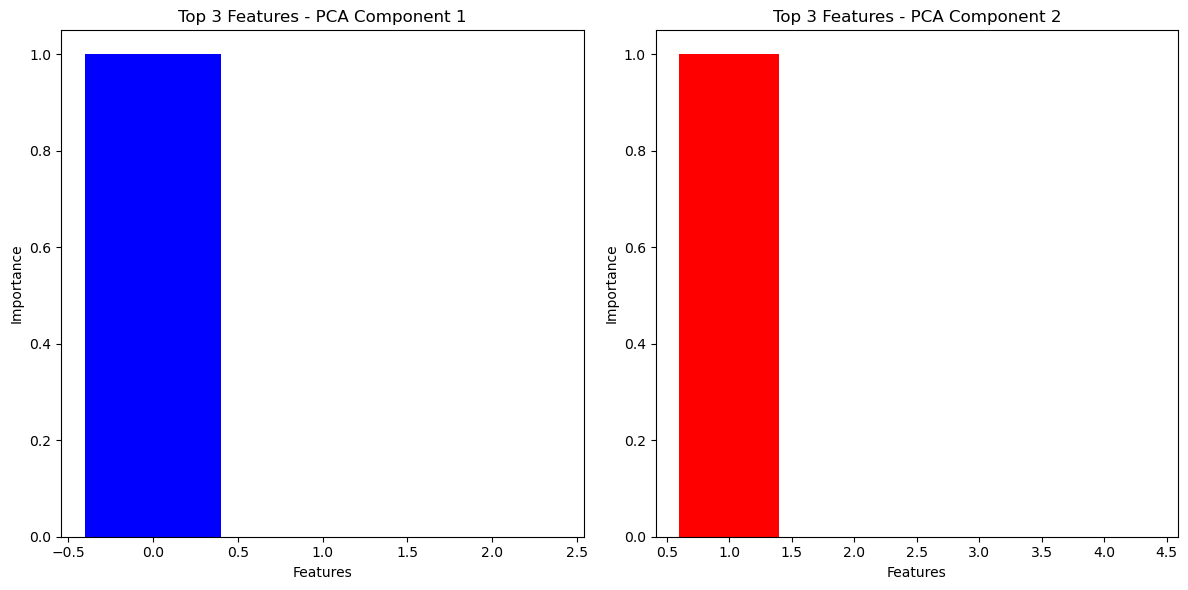

Top 3 features for PCA Component 1:
0    1.0
1    0.0
2    0.0
Name: PC1, dtype: float64

Top 3 features for PCA Component 2:
1    1.000000e+00
4    4.329870e-15
2    4.260481e-15
Name: PC2, dtype: float64


In [691]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Get the PCA components
components = pca_v.components_

# Create a DataFrame for the components
components_df = pd.DataFrame(components, columns=ts_pca.columns, index=['PC1', 'PC2'])

# Identify the top 3 most important features for each component
top_features_pc1 = components_df.loc['PC1'].abs().nlargest(3)
top_features_pc2 = components_df.loc['PC2'].abs().nlargest(3)

# Plot the top 3 features for each component
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_features_pc1.index, top_features_pc1.values, color='b')
plt.title('Top 3 Features - PCA Component 1')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.bar(top_features_pc2.index, top_features_pc2.values, color='r')
plt.title('Top 3 Features - PCA Component 2')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

# Print the top features with their importance scores
print("Top 3 features for PCA Component 1:")
print(top_features_pc1)
print("\nTop 3 features for PCA Component 2:")
print(top_features_pc2)



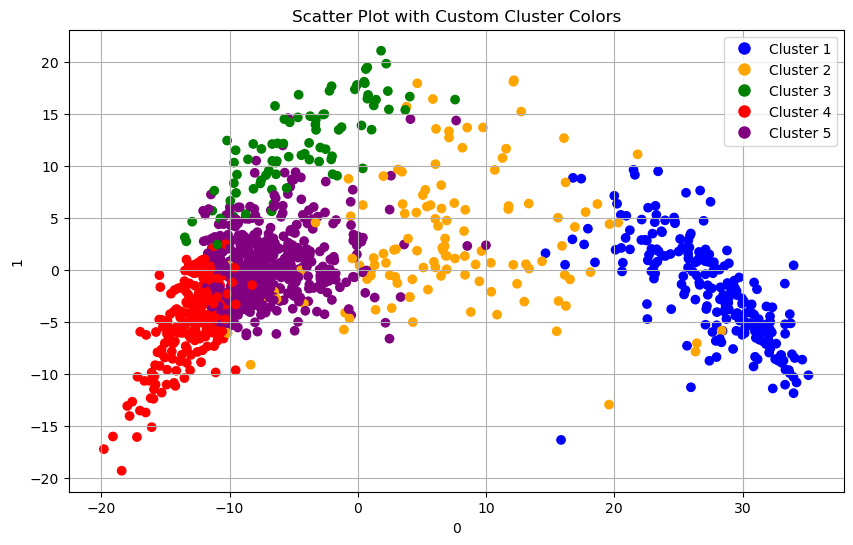

In [692]:
import pandas as pd
import matplotlib.pyplot as plt

# Custom colors
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', '#5C2E2E', 'pink']

# Sort clusters and assign colors
sorted_clusters = sorted(ts_pca_v['cluster'].unique())
color_map = {cluster: custom_colors[i] for i, cluster in enumerate(sorted_clusters)}

# Apply colors to the DataFrame
ts_pca_v['color'] = ts_pca_v['cluster'].map(color_map)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ts_pca_v[0], ts_pca_v[1], c=ts_pca_v['color'])

# Create legend with actual labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[cluster], markersize=10) for cluster in sorted_clusters]
labels = [f'Cluster {cluster}' for cluster in sorted_clusters]
plt.legend(handles, labels)

plt.xlabel('0')
plt.ylabel('1')
plt.title('Scatter Plot with Custom Cluster Colors')
plt.grid(True)
plt.show()

Quindi, ogni punto nel grafico rappresenta una serie temporale trasformata in uno spazio bidimensionale che conserva la struttura dei dati originali.  
Serie temporali simili (in termini di feature TSFresh) sono raggruppate nello stesso cluster.
Se i cluster sono ben separati nel grafico, significa che la PCA ha mantenuto una buona parte della struttura dei dati.  
PC:  
- PC1 rappresenta una combinazione di frequenze dominanti, variazioni locali e ampiezza complessiva della serie. Le serie con forti oscillazioni o variazioni regolari avranno valori distintivi lungo PC1.
- PC2 è fortemente influenzata da pattern locali e frequenze, ma con un'enfasi maggiore su strutture temporali localizzate (grazie alla CWT). Le serie con eventi localizzati o transitori si distinguono lungo PC2.

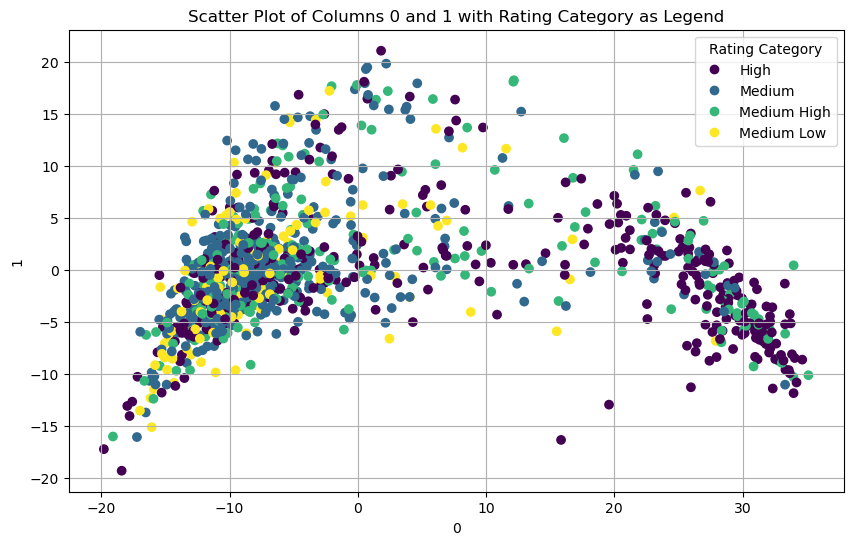

In [693]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumendo che ts_pca_v sia un DataFrame con colonne 0, 1 e 'rating_category'
categories = ts_pca_v['rating_category'].astype('category')
codes = categories.cat.codes
labels = categories.cat.categories

plt.figure(figsize=(10, 6))
scatter = plt.scatter(ts_pca_v[0], ts_pca_v[1], c=codes, cmap='viridis')

# Crea la legenda con le etichette reali
handles, _ = scatter.legend_elements()
plt.legend(handles, labels, title="Rating Category")

plt.xlabel('0')
plt.ylabel('1')
plt.title('Scatter Plot of Columns 0 and 1 with Rating Category as Legend')
plt.grid(True)
plt.show()


### T-SNE

In [694]:
ts_fscaled_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,cluster,rating_category
0,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,1.312027,0.125167,-1.128125,0.769693,...,2.783192,1.854766,2.160544,2.652144,2.990324,2.586081,0.0,0.120566,5,High
1,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,2.456624,0.772383,-1.541294,-0.159334,...,3.652298,1.325125,1.506910,1.927914,2.407828,2.256387,0.0,-0.924242,1,High
2,-0.225772,0.0,-0.029709,-0.191215,1.959914,-3.028425,-0.460390,0.371377,0.406757,2.256297,...,1.191384,1.426718,1.665945,1.815178,2.042096,2.153180,0.0,-1.732980,2,High
3,4.429242,0.0,-0.029709,-0.191215,0.217111,1.309746,3.726785,-0.018717,3.418634,0.116935,...,0.897314,-2.767978,-2.703325,-2.741879,-2.609249,-2.705067,0.0,0.408565,1,High
4,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-0.858607,-0.689299,1.639350,-1.109481,...,-0.439695,0.062613,0.259607,0.304326,0.431275,0.728397,0.0,-0.439451,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-1.116749,-0.658794,-0.011640,-0.843313,...,-1.303121,-0.990987,-0.726529,-0.546099,-0.436430,-0.282017,0.0,0.749449,4,Medium
1130,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,-0.107572,-0.112964,-0.263328,-1.966257,...,-0.599739,1.632340,1.898135,1.831650,2.424365,2.201805,0.0,-0.297338,5,Medium
1131,-0.225772,0.0,-0.029709,-0.191215,-0.053776,0.337830,-0.023703,-0.770562,0.330440,-0.689811,...,0.512839,-0.651605,-0.438992,-0.605472,-0.581191,-0.564953,0.0,0.243206,5,High
1132,-0.225772,0.0,-0.029709,5.229723,-0.053776,0.337830,-0.186617,0.028169,-1.197964,-0.099777,...,-0.295813,1.050204,0.679163,1.057861,1.132761,0.560104,0.0,1.189713,5,High


In [695]:
ts_pca = pd.DataFrame(ts_pca)

In [696]:
ts_pca['cluster'] = ts_pca_v['cluster']
ts_pca['rating_category'] = ts_pca_v['rating_category']

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_27304\3637850563.py:26: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(data=embedding_df, x='TSNE1', y='TSNE2', hue='cluster', palette=custom_colors)


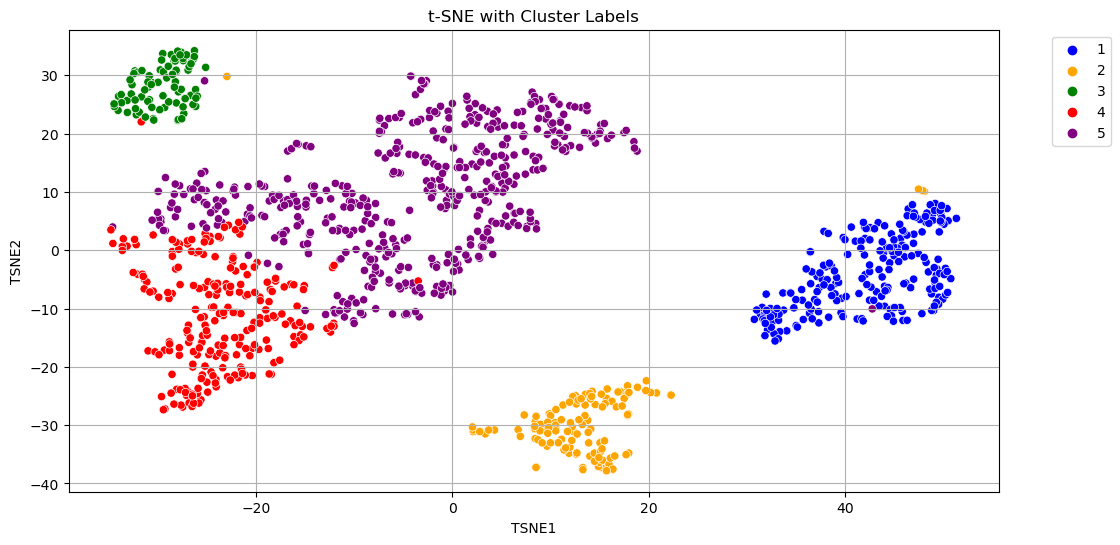

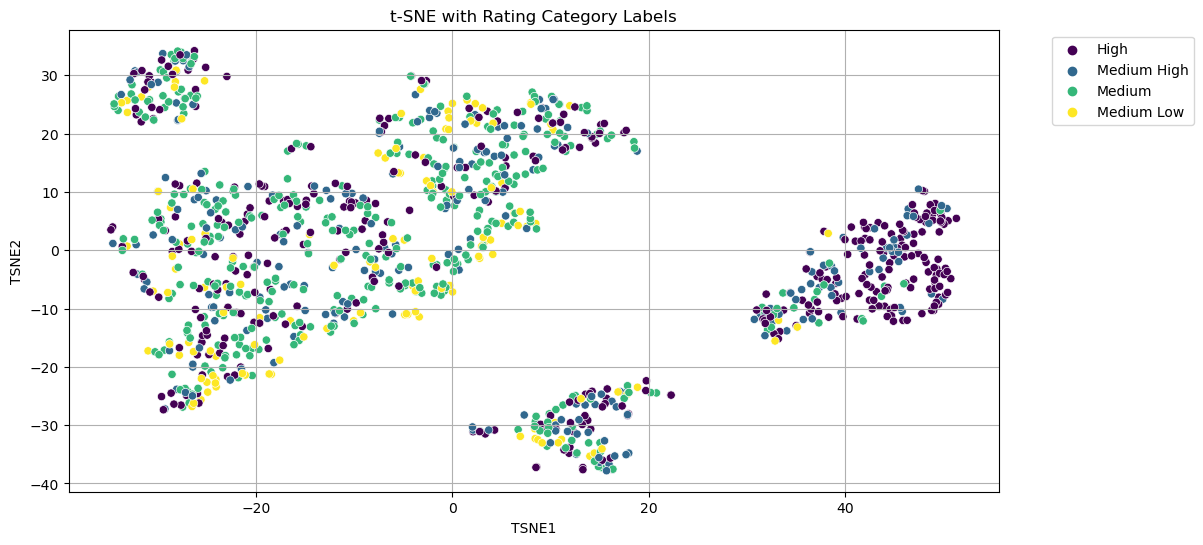

In [697]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ['blue', 'orange', 'green', 'red', 'purple', '#5C2E2E', 'pink']

# Extract features and labels
features = ts_pca.iloc[:, :-2]
cluster_labels = ts_pca['cluster']
rating_labels = ts_pca['rating_category']

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
embedding = tsne.fit_transform(features)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(embedding, columns=['TSNE1', 'TSNE2'])
embedding_df['cluster'] = cluster_labels
embedding_df['rating_category'] = rating_labels

# Plot t-SNE with cluster labels
plt.figure(figsize=(12, 6))
sns.scatterplot(data=embedding_df, x='TSNE1', y='TSNE2', hue='cluster', palette=custom_colors)
plt.title('t-SNE with Cluster Labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

custom_palette = ['#440154', '#31688E', '#35B779', '#FDE725']

# Plot t-SNE with rating category labels using custom palette
plt.figure(figsize=(12, 6))
sns.scatterplot(data=embedding_df, x='TSNE1', y='TSNE2', hue='rating_category', palette=custom_palette)
plt.title('t-SNE with Rating Category Labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# BORF

In [698]:
# !pip install aeon
# !pip install sparse

In [699]:
# !pip install -r requirements.txt

In [700]:
import pandas as pd
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score 

In [701]:
from aeon.transformations.collection.dictionary_based import BORF

In [702]:
ts = pd.read_csv("ts_transformed.csv")

In [703]:
# Unifica le classi: 'Low' → 'Medium Low'
ts['rating_category'] = ts['rating_category'].replace({'Low': 'Medium Low'})
print(ts['rating_category'].value_counts())

rating_category
Medium         387
High           377
Medium High    232
Medium Low     138
Name: count, dtype: int64


In [704]:
# Seleziona X: tutte le colonne tra la 2ª e la 101ª (escludi 'id' e target)
ts_numeric = ts.iloc[:, 1:101]

In [705]:
borf = BORF()
ts_numeric_borf = borf.fit_transform(ts_numeric)

In [706]:
type(ts_numeric_borf)

scipy.sparse._csr.csr_matrix

In [707]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
ts_scaled_borf = scaler.fit_transform(ts_numeric_borf)

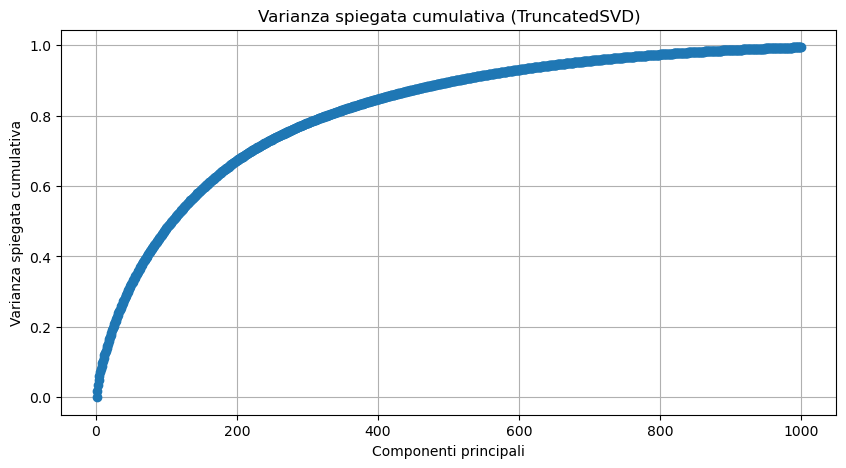

Componente 1: 0.0002
Componente 2: 0.0191
Componente 3: 0.0342
Componente 4: 0.0486
Componente 5: 0.0602
Componente 6: 0.0707
Componente 7: 0.0800
Componente 8: 0.0884
Componente 9: 0.0965
Componente 10: 0.1045
Componente 11: 0.1120
Componente 12: 0.1192
Componente 13: 0.1260
Componente 14: 0.1328
Componente 15: 0.1394
Componente 16: 0.1460
Componente 17: 0.1524
Componente 18: 0.1588
Componente 19: 0.1651
Componente 20: 0.1713
Componente 21: 0.1775
Componente 22: 0.1837
Componente 23: 0.1898
Componente 24: 0.1956
Componente 25: 0.2014
Componente 26: 0.2070
Componente 27: 0.2126
Componente 28: 0.2179
Componente 29: 0.2232
Componente 30: 0.2284
Componente 31: 0.2336
Componente 32: 0.2387
Componente 33: 0.2438
Componente 34: 0.2488
Componente 35: 0.2537
Componente 36: 0.2586
Componente 37: 0.2634
Componente 38: 0.2681
Componente 39: 0.2728
Componente 40: 0.2775
Componente 41: 0.2821
Componente 42: 0.2866
Componente 43: 0.2910
Componente 44: 0.2954
Componente 45: 0.2997
Componente 46: 0.30

In [708]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Applica TruncatedSVD (PCA per sparse)
svd = TruncatedSVD(n_components=1000, random_state=42)
ts_pca_borf = svd.fit_transform(ts_scaled_borf)

# Varianza spiegata per ciascuna componente
explained_variance = svd.explained_variance_ratio_

# Varianza spiegata cumulativa
cumulative_variance = explained_variance.cumsum()

# Grafico della varianza spiegata cumulativa
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza spiegata cumulativa (TruncatedSVD)')
plt.xlabel('Componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.grid(True)
plt.show()

# Stampa la varianza spiegata cumulativa
for i, var in enumerate(cumulative_variance):
    print(f"Componente {i+1}: {var:.4f}")

In [709]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
svd = TruncatedSVD(n_components=73, random_state=42)
ts_svd = svd.fit_transform(ts_scaled_borf)

73 perche si raggiunger 40%

In [710]:
ts_svd

array([[ 4.01513475e+01,  1.10547767e+01,  8.47398419e+00, ...,
         3.13153380e-01,  2.22385875e+00,  8.33862996e-01],
       [ 4.02858137e+01,  1.35773020e+01,  8.81873718e+00, ...,
        -9.77428952e-01,  6.39902686e+00,  2.44927506e+00],
       [ 4.01556851e+01,  2.78660339e+01,  2.34948908e+01, ...,
         1.31238353e-02, -1.60214082e+00, -3.07078569e-01],
       ...,
       [ 3.96382450e+01, -3.55940992e+00,  2.16322195e+00, ...,
         1.55125146e+01,  2.77989391e+00,  8.07291154e+00],
       [ 4.03500690e+01,  2.25097133e-01, -4.14008339e+00, ...,
        -2.34122181e+00, -6.44467001e-01,  6.48978037e-02],
       [ 3.89366375e+01,  1.86491771e+01, -3.98209449e+00, ...,
        -5.74133258e-02,  2.45276735e+00, -3.66329582e-01]])

In [711]:
# import hdbscan
# import umap
# import matplotlib.pyplot as plt
# from sklearn.metrics import silhouette_score
# import numpy as np

# # Clustering con HDBSCAN
# clusterer = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=10)
# labels = clusterer.fit_predict(ts_svd)

# # Calcolo silhouette score
# silhouette_avg = silhouette_score(ts_svd, labels)
# print(f"Silhouette Score: {silhouette_avg:.4f}")

# # UMAP per visualizzazione
# X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(ts_svd)

# # Prime due componenti di SVD
# X_svd_2d = ts_svd[:, :2]

# # Colori fissi per massimo 3 cluster
# colors = ['red', 'green', 'blue']
# unique_labels = np.unique(labels)
# color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# # Plot con UMAP
# plt.figure(figsize=(10, 6))
# for label in unique_labels:
#     plt.scatter(X_umap[labels == label, 0], X_umap[labels == label, 1],
#                 c=color_map[label], label=f'Cluster {label}', s=5)
# plt.title('Cluster con UMAP')
# plt.xlabel('UMAP 1')
# plt.ylabel('UMAP 2')
# plt.grid(True)
# plt.legend()
# plt.show()

# # Plot con SVD
# plt.figure(figsize=(10, 6))
# for label in unique_labels:
#     plt.scatter(X_svd_2d[labels == label, 0], X_svd_2d[labels == label, 1],
#                 c=color_map[label], label=f'Cluster {label}', s=5)
# plt.title('Cluster con prime due componenti SVD')
# plt.xlabel('SVD 1')
# plt.ylabel('SVD 2')
# plt.grid(True)
# plt.legend()
# plt.show()


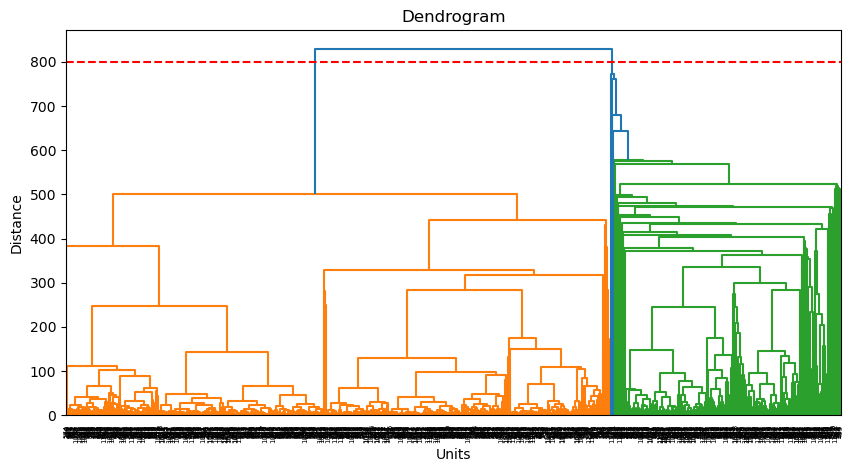

Cluster ottenuti con taglio a 1.5: [2 2 2 ... 1 1 2]


In [712]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calcolo del linkage
Z = linkage(ts_svd, method='ward')

# Visualizzazione del dendrogramma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Units")
plt.ylabel("Distance")

# Aggiunta della linea orizzontale all'altezza 1.5
plt.axhline(y=800, color='r', linestyle='--')

plt.show()

# Taglio del dendrogramma per ottenere i cluster
clusters_s = fcluster(Z, t= 800, criterion='distance')

# Valutazione dei cluster ottenuti
print(f"Cluster ottenuti con taglio a 1.5: {clusters_s}")

In [713]:
silhouette_avg = silhouette_score(ts_svd, clusters_s)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3975


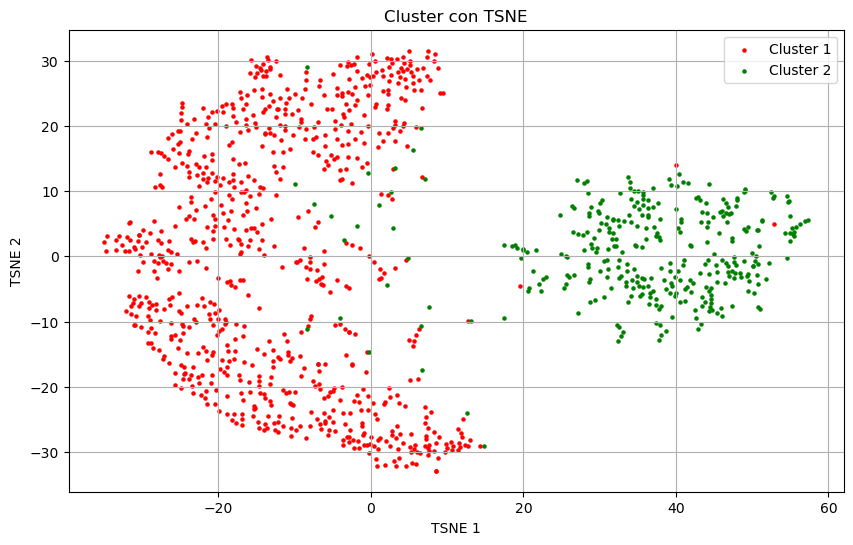

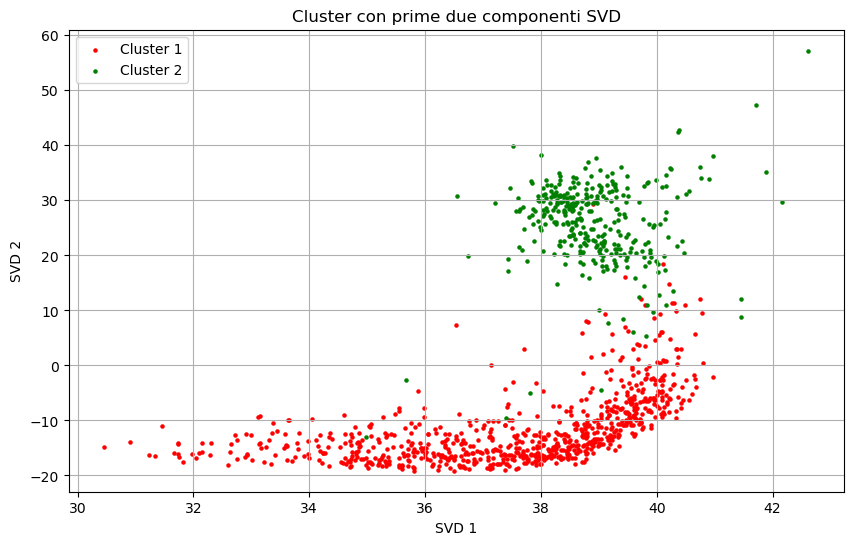

In [714]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE

# TSNE per visualizzazione
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(ts_svd)

# Prime due componenti di SVD
X_svd_2d = ts_svd[:, :2]

# Colori per i cluster
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
unique_labels = np.unique(clusters_s)
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Plot con TSNE
plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_tsne[clusters_s == label, 0], X_tsne[clusters_s == label, 1],
                c=color_map[label], label=f'Cluster {label}', s=5)
plt.title('Cluster con TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.grid(True)
plt.legend()
plt.show()

# Plot con SVD
plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_svd_2d[clusters_s == label, 0], X_svd_2d[clusters_s == label, 1],
                c=color_map[label], label=f'Cluster {label}', s=5)
plt.title('Cluster con prime due componenti SVD')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.grid(True)
plt.legend()
plt.show()

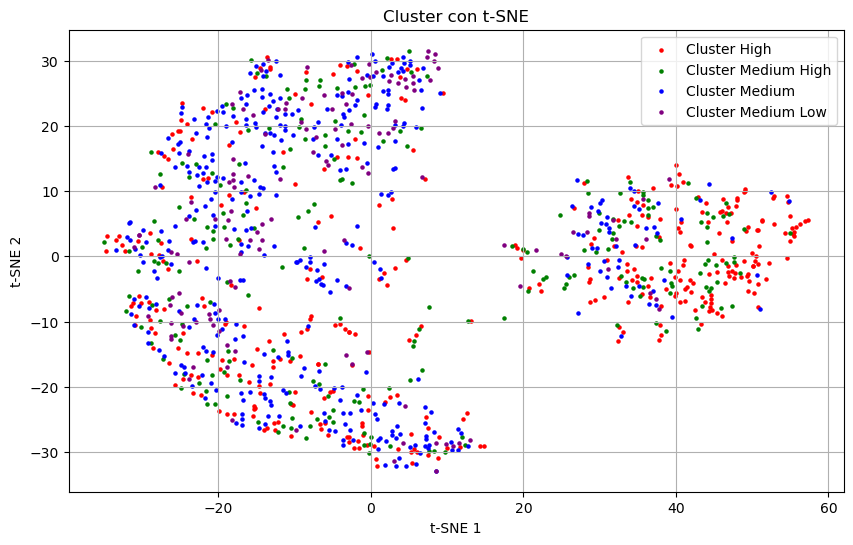

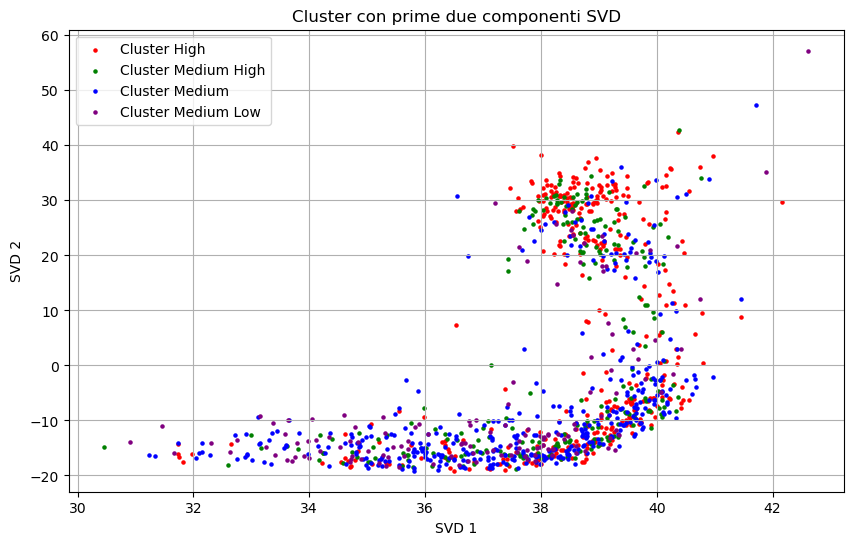

In [715]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Assuming ts_svd and ts are already defined
# ts_svd should be a numpy array and ts should be a DataFrame

# Create DataFrame from ts_svd and add rating_category column
ts_svd_df = pd.DataFrame(ts_svd)
ts_svd_df['rating_category'] = ts['rating_category']

# t-SNE for visualization
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(ts_svd_df.drop(columns=['rating_category']))

# First two components of SVD
X_svd_2d = ts_svd_df.iloc[:, :2].values

# Colors for clusters
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
unique_labels = ts_svd_df['rating_category'].unique()
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Plot with t-SNE
plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_tsne[ts_svd_df['rating_category'] == label, 0], X_tsne[ts_svd_df['rating_category'] == label, 1],
                c=color_map[label], label=f'Cluster {label}', s=5)
plt.title('Cluster con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.legend()
plt.show()

# Plot with SVD
plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_svd_2d[ts_svd_df['rating_category'] == label, 0], X_svd_2d[ts_svd_df['rating_category'] == label, 1],
                c=color_map[label], label=f'Cluster {label}', s=5)
plt.title('Cluster con prime due componenti SVD')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.grid(True)
plt.legend()
plt.show()

In [716]:
ts_svd_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,rating_category
0,40.151347,11.054777,8.473984,1.186149,12.800956,24.898497,-29.127310,2.631460,2.343593,12.678268,...,5.119717,-2.261399,5.329444,-3.740854,-3.477357,4.202420,0.313153,2.223859,0.833863,High
1,40.285814,13.577302,8.818737,2.251381,27.636661,27.209117,-100.198818,301.376914,177.847800,-124.129913,...,0.645463,3.065458,0.438072,-3.533113,0.272853,0.934497,-0.977429,6.399027,2.449275,High
2,40.155685,27.866034,23.494891,22.174297,24.708053,22.149241,-25.355893,-28.650679,11.114141,2.557154,...,2.640100,1.169453,-1.138438,0.872550,-0.367109,-1.312678,0.013124,-1.602141,-0.307079,High
3,38.765026,23.249217,-5.292783,-0.613501,-0.404360,-2.005902,1.886979,3.090244,3.384184,-1.080568,...,9.832265,1.596630,34.903154,38.575729,53.700132,-42.662053,-38.891645,-17.652124,25.535985,High
4,36.296899,-13.889373,2.576000,1.288106,0.858075,1.039017,-3.691175,0.347910,-0.709747,-0.916318,...,-0.008964,1.789205,0.442584,1.324479,1.494743,-1.310686,-0.193500,-0.194360,1.814359,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,36.037284,-16.937647,1.633603,0.693036,1.420952,2.400433,-7.399048,-2.043148,-6.028314,-3.664961,...,-0.051967,-0.453541,-0.111869,0.143666,0.859343,-0.244366,-1.087368,-0.379578,0.977327,Medium
1130,35.668401,-2.585857,14.713973,5.433629,16.134482,29.505545,-37.055246,-4.028735,-8.937192,-5.153203,...,-3.851295,-11.108313,1.308441,-0.006856,9.819245,6.986080,-2.638778,-16.222216,1.038949,Medium
1131,39.638245,-3.559410,2.163222,-1.832372,-0.978723,-1.470105,3.623988,1.688519,5.206899,8.599721,...,-3.717667,9.238042,1.585971,8.643984,-3.782551,-4.047449,15.512515,2.779894,8.072912,High
1132,40.350069,0.225097,-4.140083,-1.662277,-5.231628,-7.322221,16.381642,4.258873,9.336841,6.213850,...,1.720164,3.019812,-1.006976,2.081314,0.714388,0.585793,-2.341222,-0.644467,0.064898,High


In [717]:
clusters_s

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

In [718]:
ts['cluster'] = clusters_s

In [719]:
ts['cluster'].unique()

array([2, 1])

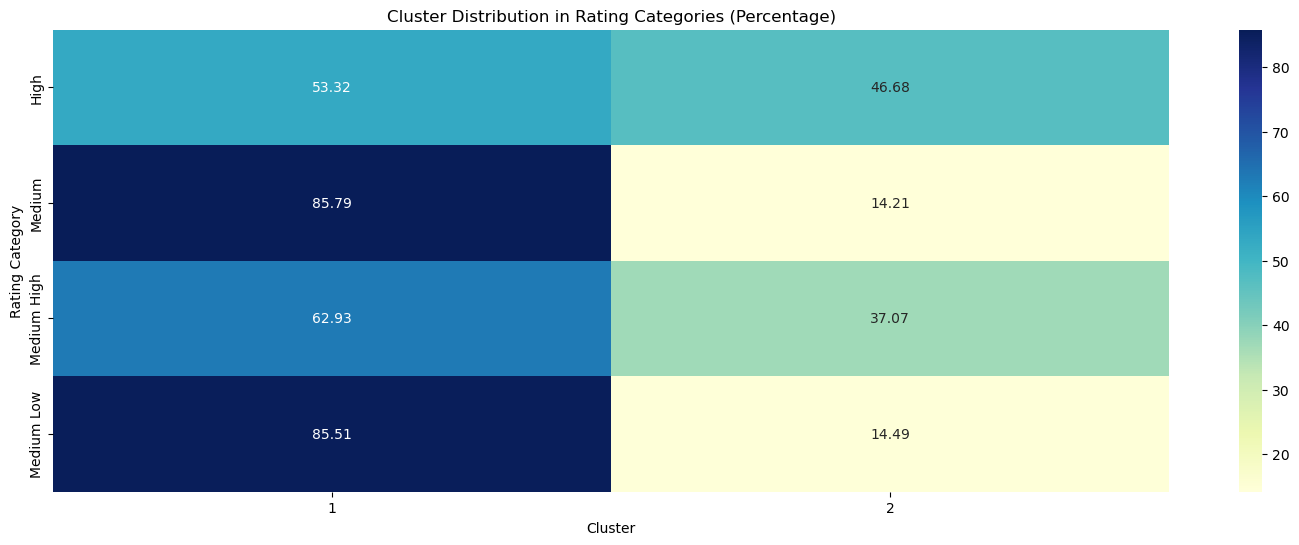


Cluster Purity by Rating Category:
cluster
1    0.298350
2    0.415127
dtype: float64


In [720]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione delle categorie di rating per cluster
rating_distribution = ts.groupby(['rating_category', 'cluster']).size().unstack(fill_value=0)

# Converte i conteggi in percentuali rispetto al totale per ciascuna categoria di rating
rating_distribution_percentage = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

# Crea la heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(rating_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cluster Distribution in Rating Categories (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Rating Category')
plt.show()

# Calculate cluster purity for rating category
rating_purity = rating_distribution_percentage.max(axis=0) / rating_distribution_percentage.sum(axis=0)

print("\nCluster Purity by Rating Category:")
print(rating_purity)

In [721]:
rating_purity.mean()

0.35673847686188764

In [722]:
import pandas as pd
from ast import literal_eval

ts_gen = ts.copy()

# Convert the genre column from string representation of list to actual list
ts_gen['genre'] = ts_gen['genre'].apply(literal_eval)

# Create a new DataFrame with binary columns for each genre
genres = set(g for sublist in ts_gen['genre'] for g in sublist)
for genre in genres:
    ts_gen[genre] = ts_gen['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genre column
ts_gen = ts_gen.drop(columns=['genre'])

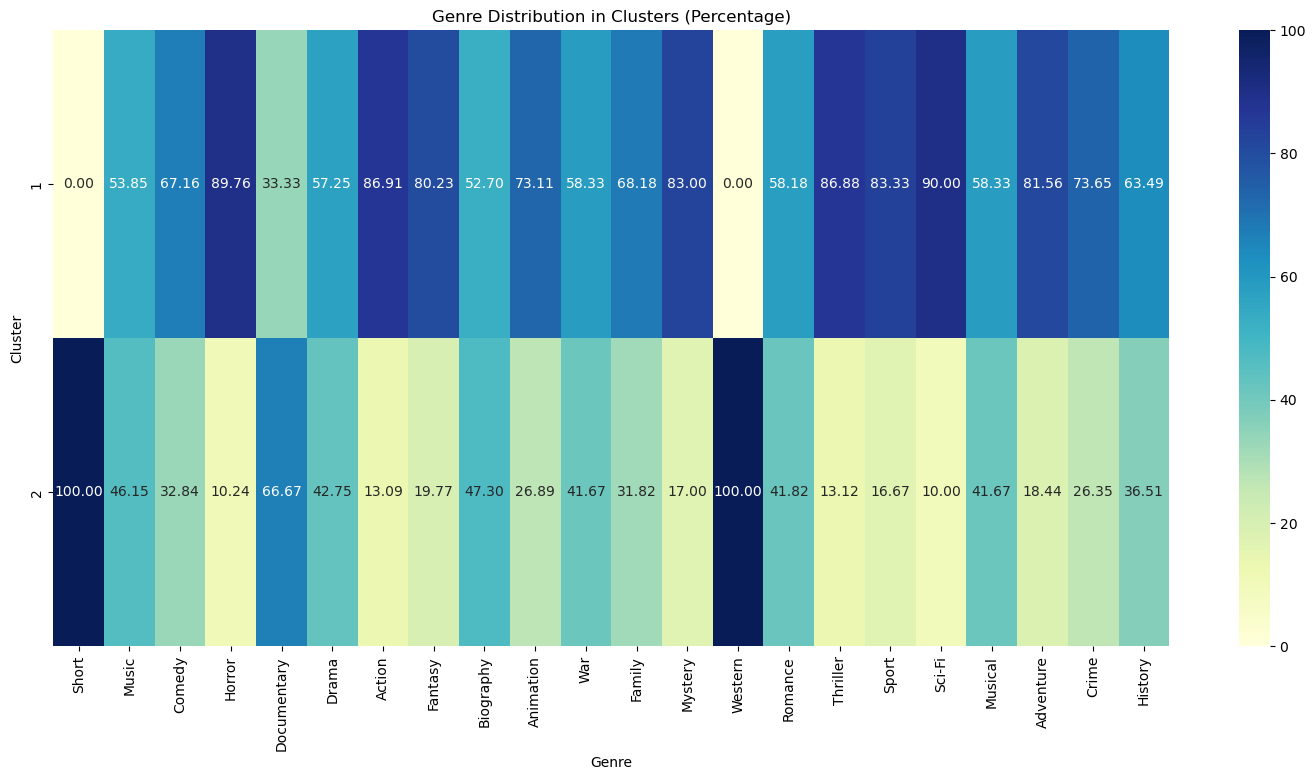

Cluster Purity by Genre:
cluster
1    0.064321
2    0.124882
dtype: float64


In [723]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione dei generi per cluster
genre_columns = ts_gen.columns[-22:]
genre_distribution = ts_gen.groupby('cluster')[genre_columns].sum()

# Converte i conteggi in percentuali rispetto al totale per ciascun genere
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=0), axis=1) * 100

# Crea la heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(genre_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Genre Distribution in Clusters (Percentage)')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

# Calcola la purity per ciascun genere
genre_purity = genre_distribution_percentage.max(axis=1) / genre_distribution_percentage.sum(axis=1)

print("Cluster Purity by Genre:")
print(genre_purity)

In [724]:
genre_purity.mean()

0.09460114450486659

Con borf sia con hdbscan che con gerarchico si creano solo due cluster, se si prova a cercarne altri si ottengono outliers, quindi con i nostri dati no buono, meglio Feature based - PCA - gerarchico